Importing Libraries

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import easygui as ey
import warnings
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report,roc_auc_score

import statsmodels.api as sm
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline

Reading the csv file

In [352]:
path=ey.fileopenbox()

In [353]:
path

'C:\\Users\\nirai\\train.csv'

In [354]:
df=pd.read_csv('C:\\Users\\nirai\\train.csv')
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

To check the datatype of the dataset

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [356]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

Checking the shape of the dataset

In [357]:
df.shape

(58592, 44)

It shows the statistical summary of the dataset

In [358]:
df.describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
is_claim                0.000000     0.000000      0.000000      1.000000

Preprocessing and Eda 

In [359]:
df.drop('policy_id',axis=1,inplace=True)

In [360]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

Checking unique Values

In [361]:
df.nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                     

Dropping policy tenure column

In [362]:
df.drop('policy_tenure',axis=1)

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0            0.05             0.644231           C1                4990     1   
1            0.02             0.375000           C2               27003     1   
2            0.02             0.384615           C3                4076     1   
3            0.11             0.432692           C4               21622     1   
4            0.11             0.634615           C5               34738     2   
...           ...                  ...          ...                 ...   ...   
58587        0.13             0.644231           C8                8794     2   
58588        0.02             0.519231          C14                7788     1   
58589        0.05             0.451923           C5               34738     1   
58590        0.14             0.557692           C8                8794     1   
58591        0.02             0.442308           C8                8794     3   

      segment model fuel_type     max_torque          max_power  \
0           A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
1           A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
2           A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
3          C1    M2    Petrol  113Nm@4400rpm   88.50bhp@6000rpm   
4           A    M3    Petrol   91Nm@4250rpm   67.06bhp@5500rpm   
...       ...   ...       ...            ...                ...   
58587       A    M3    Petrol   91Nm@4250rpm   67.06bhp@5500rpm   
58588       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
58589       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
58590      B2    M6    Petrol  113Nm@4400rpm   88.50bhp@6000rpm   
58591      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   

              engine_type  airbags is_esc is_adjustable_steering is_tpms  \
0       F8D Petrol Engine        2     No                     No      No   
1       F8D Petrol Engine        2     No                     No      No   
2       F8D Petrol Engine        2     No                     No      No   
3      1.2 L K12N Dualjet        2    Yes                    Yes      No   
4                 1.0 SCe        2     No                     No      No   
...                   ...      ...    ...                    ...     ...   
58587             1.0 SCe        2     No                     No      No   
58588   F8D Petrol Engine        2     No                     No      No   
58589   F8D Petrol Engine        2     No                     No      No   
58590   K Series Dual jet        2     No                    Yes      No   
58591       1.5 L U2 CRDi        6    Yes                    Yes     Yes   

      is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0                    Yes                No             Drum           796   
1                    Yes                No             Drum           796   
2                    Yes                No             Drum           796   
3                    Yes               Yes             Drum          1197   
4                     No               Yes             Drum           999   
...                  ...               ...              ...           ...   
58587                 No               Yes             Drum           999   
58588                Yes                No             Drum           796   
58589                Yes                No             Drum           796   
58590                Yes                No             Drum          1197   
58591                Yes               Yes             Disc          1493   

       cylinder transmission_type  gear_box steering_type  turning_radius  \
0             3            Manual         5         Power             4.6   
1             3            Manual         5         Power             4.6   
2             3            Manual         5         Power             4.6   
3             4         Automatic         5      Electric             4.8   
4     

In [363]:
df.max_power.unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [364]:
df.max_torque.unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [365]:
df.sort_values('displacement',ascending=False)

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
45288       0.412718        0.09             0.317308           C2   
47325       0.093532        0.08             0.432692          C15   
31409       0.690410        0.17             0.461538          C10   
31410       1.235462        0.12             0.326923           C2   
42422       0.099768        0.18             0.500000           C2   
...              ...         ...                  ...          ...   
14842       0.219036        0.08             0.346154           C3   
14844       0.044793        0.03             0.346154          C16   
14845       0.935528        0.03             0.548077           C2   
41615       0.342143        0.01             0.355769           C4   
0           0.515874        0.05             0.644231           C1   

       population_density  make segment model fuel_type     max_torque  \
45288               27003     5      C1    M9    Diesel  200Nm@1750rpm   
47325                 290     5      C1    M9    Diesel  200Nm@1750rpm   
31409               73430     5      C1    M9    Diesel  200Nm@1750rpm   
31410               27003     5      C1    M9    Diesel  200Nm@1750rpm   
42422               27003     5      C1    M9    Diesel  200Nm@1750rpm   
...                   ...   ...     ...   ...       ...            ...   
14842                4076     1       A    M1       CNG   60Nm@3500rpm   
14844               16206     1       A    M1       CNG   60Nm@3500rpm   
14845               27003     1       A    M1       CNG   60Nm@3500rpm   
41615               21622     1       A    M1       CNG   60Nm@3500rpm   
0                    4990     1       A    M1       CNG   60Nm@3500rpm   

              max_power        engine_type  airbags is_esc  \
45288  97.89bhp@3600rpm             i-DTEC        2     No   
47325  97.89bhp@3600rpm             i-DTEC        2     No   
31409  97.89bhp@3600rpm             i-DTEC        2     No   
31410  97.89bhp@3600rpm             i-DTEC        2     No   
42422  97.89bhp@3600rpm             i-DTEC        2     No   
...                 ...                ...      ...    ...   
14842  40.36bhp@6000rpm  F8D Petrol Engine        2     No   
14844  40.36bhp@6000rpm  F8D Petrol Engine        2     No   
14845  40.36bhp@6000rpm  F8D Petrol Engine        2     No   
41615  40.36bhp@6000rpm  F8D Petrol Engine        2     No   
0      40.36bhp@6000rpm  F8D Petrol Engine        2     No   

      is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
45288                    Yes      No                Yes               Yes   
47325                    Yes      No                Yes               Yes   
31409                    Yes      No                Yes               Yes   
31410                    Yes      No                Yes               Yes   
42422                    Yes      No                Yes               Yes   
...                      ...     ...                ...               ...   
14842                     No      No                Yes                No   
14844                     No      No                Yes                No   
14845                     No      No                Yes                No   
41615                     No      No                Yes                No   
0                         No      No                Yes                No   

      rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
45288             Drum          1498         4            Manual         5   
47325             Drum          1498         4            Manual         5   
31409             Drum          1498         4            Manual         5   
31410             Drum          1498         4            Manual         5   
42422             Drum          1498         4            Manual         5   
...                ...           ...       ...               ...       ...   
14842             Drum           796         3            Man

In [366]:
df.groupby('segment')[['displacement','is_claim']].describe().T

segment                        A           B1            B2           C1  \
displacement count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean     823.811270   998.000000   1223.176695  1376.094743   
             std       69.803312     0.000000     84.665109   147.572646   
             min      796.000000   998.000000   1197.000000  1197.000000   
             25%      796.000000   998.000000   1197.000000  1197.000000   
             50%      796.000000   998.000000   1197.000000  1498.000000   
             75%      796.000000   998.000000   1197.000000  1498.000000   
             max      999.000000   998.000000   1497.000000  1498.000000   
is_claim     count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean       0.060389     0.058471      0.068581     0.064099   
             std        0.238213     0.234660      0.252748     0.244964   
             min        0.000000     0.000000      0.000000     0.000000   
             25%        0.000000     0.000000      0.000000     0.000000   
             50%        0.000000     0.000000      0.000000     0.000000   
             75%        0.000000     0.000000      0.000000     0.000000   
             max        1.000000     1.000000      1.000000     1.000000   

segment                       C2      Utility  
displacement count  14018.000000  1209.000000  
             mean    1493.000000  1196.000000  
             std        0.000000     0.000000  
             min     1493.000000  1196.000000  
             25%     1493.000000  1196.000000  
             50%     1493.000000  1196.000000  
             75%     1493.000000  1196.000000  
             max     1493.000000  1196.000000  
is_claim     count  14018.000000  1209.000000  
             mean       0.064275     0.060380  
             std        0.245250     0.238289  
             min        0.000000     0.000000  
             25%        0.000000     0.000000  
             50%        0.000000     0.000000  
             75%        0.000000     0.000000  
             max        1.000000     1.000000

Checking the missing values in the dataset

In [367]:
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

Filtering with the object data type unique values

In [368]:
df.select_dtypes('object').nunique()

area_cluster                        22
segment                              6
model                               11
fuel_type                            3
max_torque                           9
max_power                            9
engine_type                         11
is_esc                               2
is_adjustable_steering               2
is_tpms                              2
is_parking_sensors                   2
is_parking_camera                    2
rear_brakes_type                     2
transmission_type                    2
steering_type                        3
is_front_fog_lights                  2
is_rear_window_wiper                 2
is_rear_window_washer                2
is_rear_window_defogger              2
is_brake_assist                      2
is_power_door_locks                  2
is_central_locking                   2
is_power_steering                    2
is_driver_seat_height_adjustable     2
is_day_night_rear_view_mirror        2
is_ecw                   

Multicollinearity

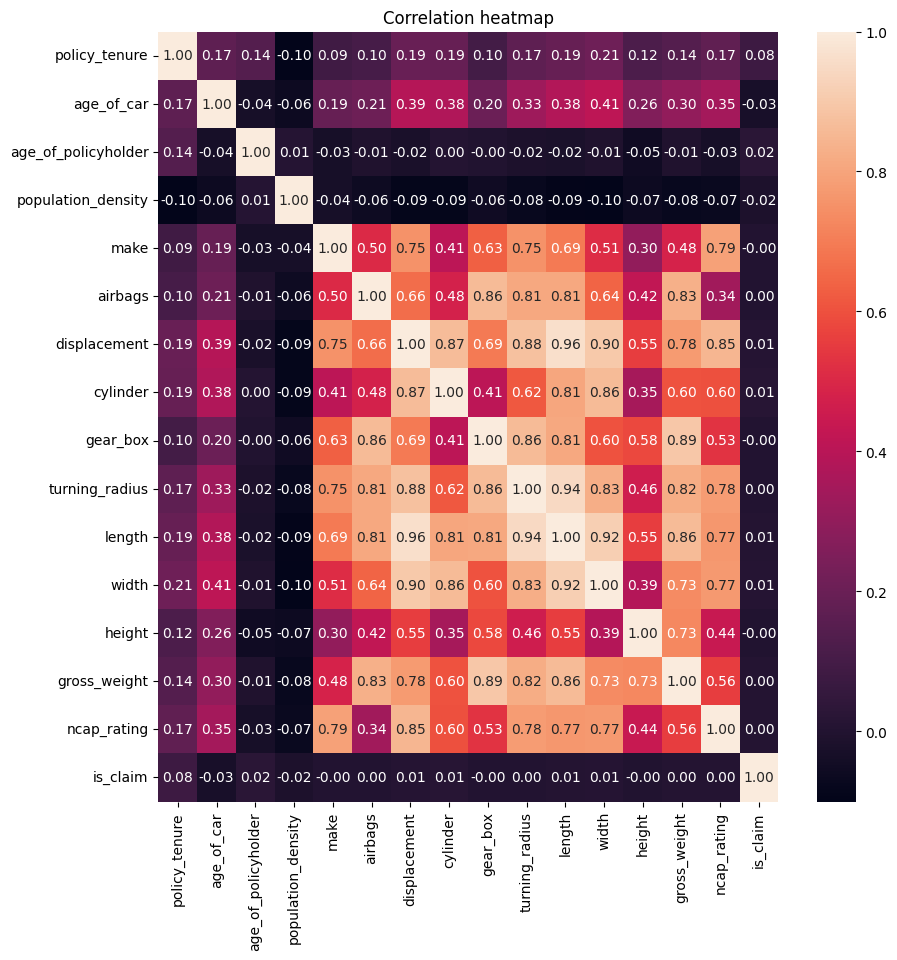

In [369]:
#Checking for Multicollinearity
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax )
plt.title("Correlation heatmap")
plt.show()

In [370]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})

column  Correlation with is_claim
0              is_claim                   1.000000
1         policy_tenure                   0.078747
2   age_of_policyholder                   0.022435
3              cylinder                   0.013434
4                 width                   0.009947
5          displacement                   0.007678
6                length                   0.006495
7          gross_weight                   0.003894
8           ncap_rating                   0.003800
9               airbags                   0.002789
10       turning_radius                   0.002724
11                 make                  -0.000456
12             gear_box                  -0.000635
13               height                  -0.002024
14   population_density                  -0.017808
15           age_of_car                  -0.028172

As we can see, a lot of data is corrilated each other. It leads to multicollinearity. It can badly affect the regression. So let deal with this problem by implementation VIF metric.

Variation Inflation Factor

In [371]:
def vif_check(df_check):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_check.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df_check.values, i)
                          for i in range(len(df_check.columns))]
  
    return vif_data.sort_values("VIF", ascending=False).reset_index()

In [372]:
df_check = df.select_dtypes(exclude=["object"]).drop("is_claim", axis=1)

#cycle which returns features having VIF < 5, or Featues with low correlation
while vif_check(df_check)["VIF"][0] > 5:
    df_check.drop(vif_check(df_check)["feature"][0], axis=1, inplace=True)
feature_vif_table = vif_check(df_check)

feature_vif_table

index             feature       VIF
0      3             airbags  3.587326
1      4         ncap_rating  3.221815
2      1          age_of_car  2.779371
3      0       policy_tenure  2.698111
4      2  population_density  1.684834

In [373]:
df_clean = pd.concat([df.select_dtypes("object"), 
                        df[list(feature_vif_table["feature"])], 
                        df["is_claim"]], axis=1)

In [374]:
df_clean.describe()

airbags   ncap_rating    age_of_car  policy_tenure  \
count  58592.000000  58592.000000  58592.000000   58592.000000   
mean       3.137066      1.759950      0.069424       0.611246   
std        1.832641      1.389576      0.056721       0.414156   
min        1.000000      0.000000      0.000000       0.002735   
25%        2.000000      0.000000      0.020000       0.210250   
50%        2.000000      2.000000      0.060000       0.573792   
75%        6.000000      3.000000      0.110000       1.039104   
max        6.000000      5.000000      1.000000       1.396641   

       population_density      is_claim  
count        58592.000000  58592.000000  
mean         18826.858667      0.063968  
std          17660.174792      0.244698  
min            290.000000      0.000000  
25%           6112.000000      0.000000  
50%           8794.000000      0.000000  
75%          27003.000000      0.000000  
max          73430.000000      1.000000

PLotting the cleaned df with hist plot

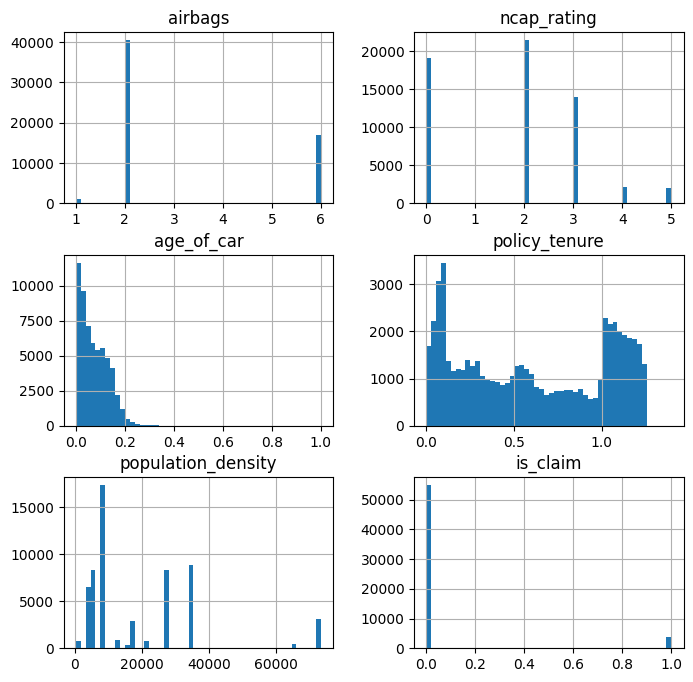

In [375]:
df_clean.hist(bins=50, figsize=(8,8))
plt.show()

In [376]:
df_clean = df_clean[df_clean["age_of_car"] < 0.25] 

Count plot 

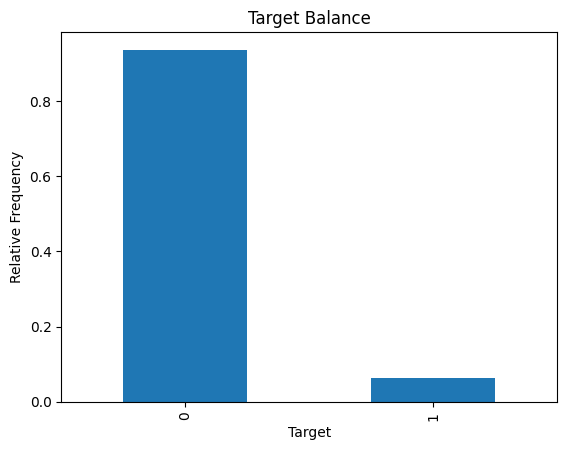

In [377]:
df['is_claim'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Relative Frequency')
plt.xlabel('Target')
plt.title('Target Balance');

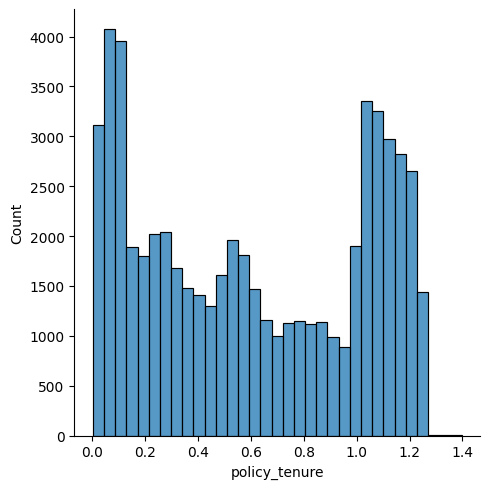

In [378]:
sns.displot(df['policy_tenure'])

Grouping models and average age of car using bar plot

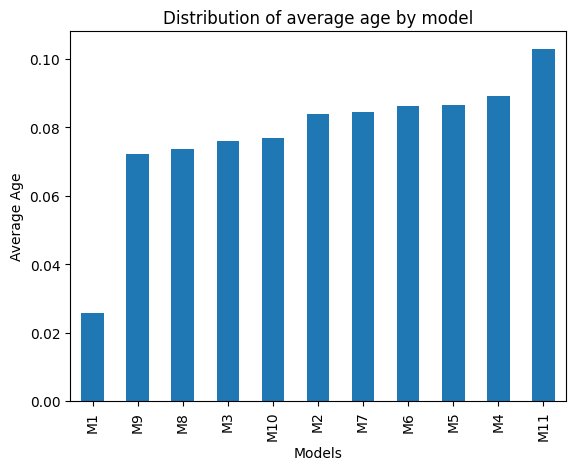

In [379]:
df.groupby('model')['age_of_car'].mean().sort_values().plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Average Age')
plt.title('Distribution of average age by model');

Grouping by no of sectors and frequency using bar plot

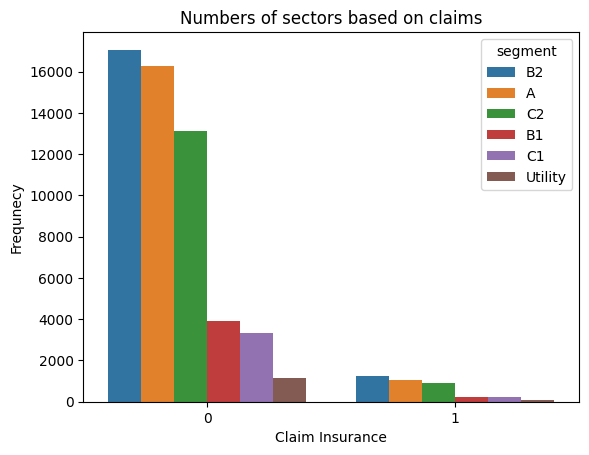

In [380]:
ffg = df.groupby('is_claim')['segment'].value_counts().rename('Frequency').to_frame().reset_index()
sns.barplot(x='is_claim',
           y='Frequency',
           hue='segment',
           data=ffg)
plt.xlabel('Claim Insurance')
plt.ylabel('Frequnecy')
plt.title('Numbers of sectors based on claims');

plotting with scatter plot to check the outliers or distribution of the dataset

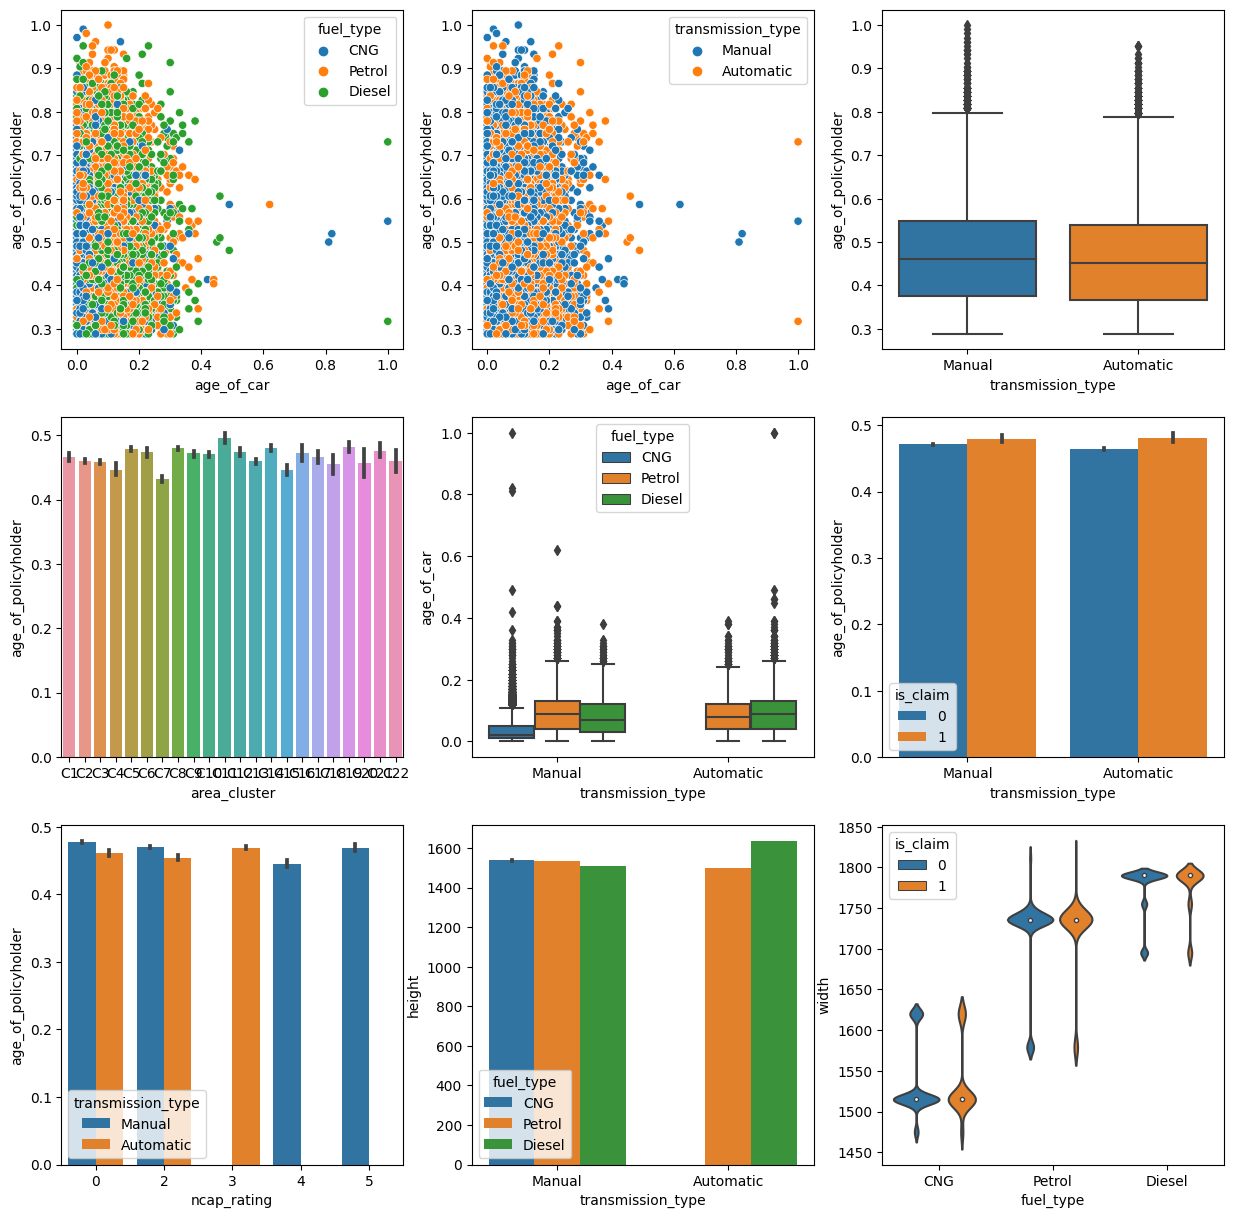

In [381]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age_of_car',y ='age_of_policyholder',hue="fuel_type",data = df)
plt.subplot(3,3,2)
sns.scatterplot(x="age_of_car",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="transmission_type",y="age_of_policyholder",data=df)
plt.subplot(3,3,4)
sns.barplot(x="area_cluster",y="age_of_policyholder",data=df)
plt.subplot(3,3,5)
sns.boxplot(x="transmission_type",y="age_of_car",hue="fuel_type",data=df)
plt.subplot(3,3,6)
sns.barplot(x="transmission_type",y="age_of_policyholder",hue="is_claim",data=df)
plt.subplot(3,3,7)
sns.barplot(x="ncap_rating",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,8)
sns.barplot(x="transmission_type",y="height",hue="fuel_type",data=df)
plt.subplot(3,3,9)
sns.violinplot(x="fuel_type",y="width",hue="is_claim",data=df)
plt.show()

Count plotting Numerical features with claim 

<AxesSubplot: xlabel='ncap_rating', ylabel='count'>

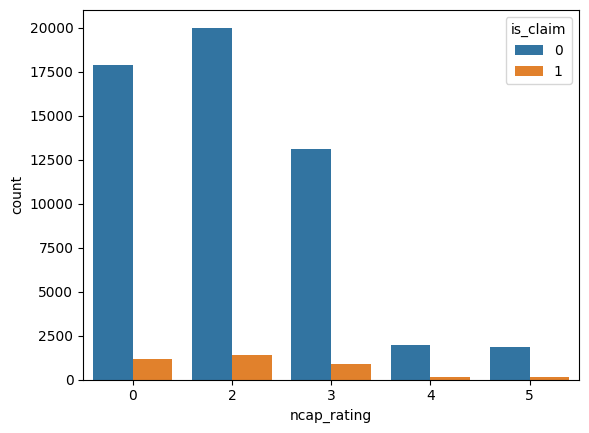

In [382]:
sns.countplot(x='ncap_rating',data=df,hue='is_claim')


<AxesSubplot: xlabel='airbags', ylabel='count'>

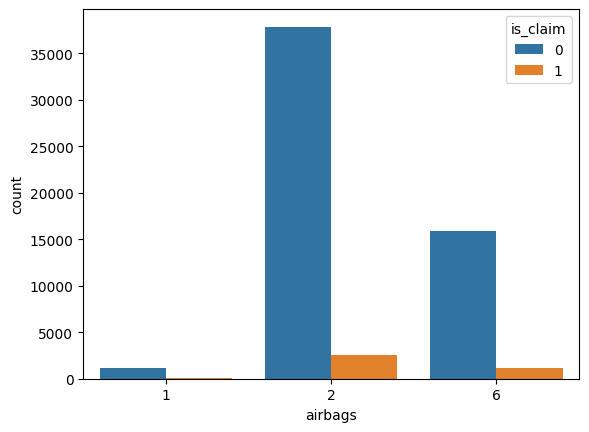

In [383]:
sns.countplot(x='airbags',data=df,hue='is_claim')

<AxesSubplot: xlabel='age_of_policyholder', ylabel='count'>

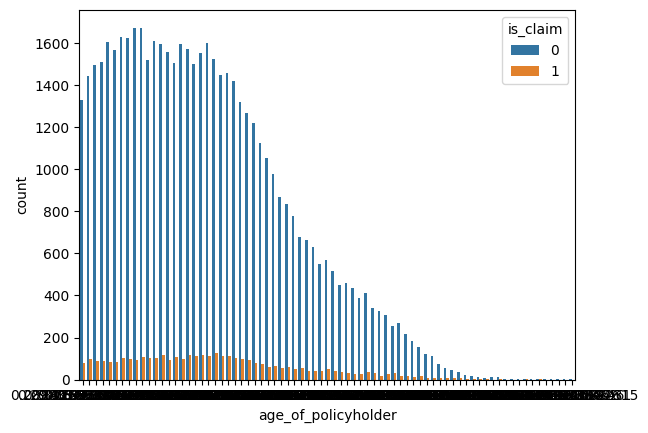

In [384]:
sns.countplot(x='age_of_policyholder',data=df,hue='is_claim')

<AxesSubplot: xlabel='cylinder', ylabel='count'>

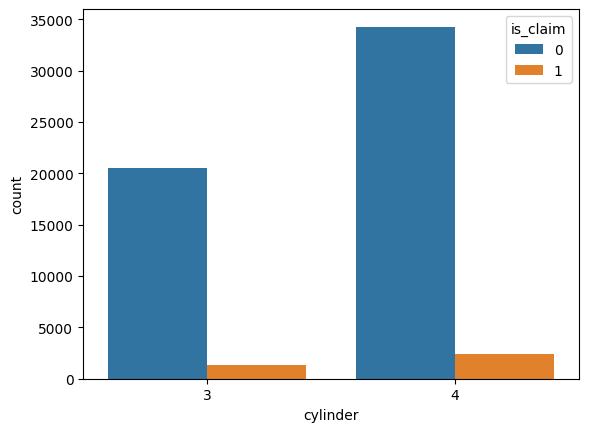

In [385]:
sns.countplot(x='cylinder',data=df,hue='is_claim')

<AxesSubplot: xlabel='gear_box', ylabel='count'>

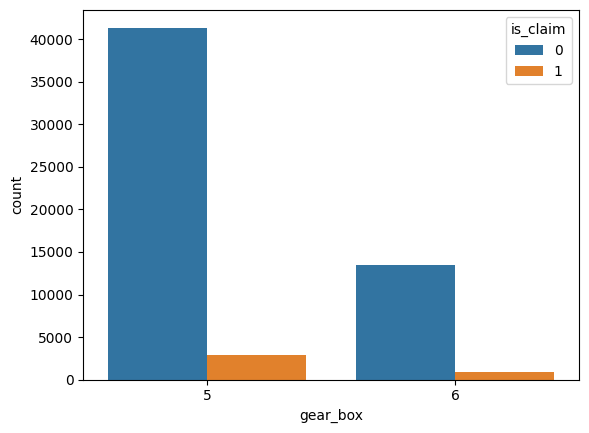

In [386]:
sns.countplot(x='gear_box',data=df,hue='is_claim')

<AxesSubplot: xlabel='population_density', ylabel='count'>

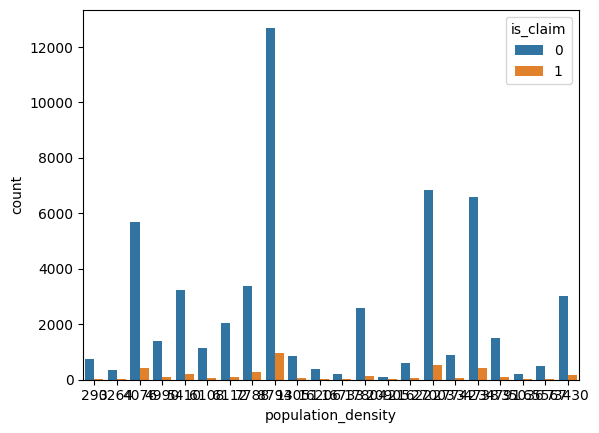

In [387]:
sns.countplot(x='population_density',data=df,hue='is_claim')

In [388]:
df['age_of_car'].value_counts()

0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26      24
0.29      21
0.32      13
0.33      12
0.36       8
0.34       6
0.39       5
0.38       4
1.00       3
0.37       3
0.49       2
0.46       2
0.44       2
0.42       1
0.45       1
0.35       1
0.82       1
0.62       1
0.81       1
Name: age_of_car, dtype: int64

Plotting using hist plot,bar and pie plot

<AxesSubplot: ylabel='Frequency'>

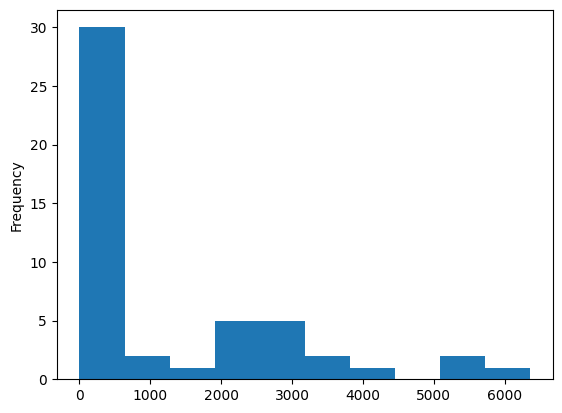

In [389]:
df['age_of_car'].value_counts().plot(kind='hist')

<AxesSubplot: ylabel='age_of_car'>

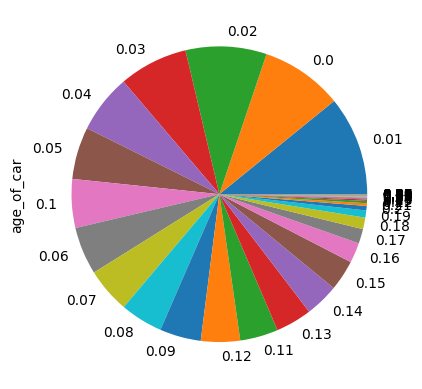

In [390]:
df['age_of_car'].value_counts().plot(kind='pie')

In [391]:
df['age_of_policyholder'].value_counts()

0.375000    1779
0.365385    1766
0.346154    1733
0.355769    1724
0.394231    1715
0.471154    1713
0.403846    1710
0.432692    1696
0.326923    1691
0.442308    1691
0.461538    1670
0.336538    1652
0.480769    1651
0.413462    1650
0.384615    1622
0.451923    1614
0.423077    1613
0.317308    1599
0.307692    1584
0.500000    1566
0.490385    1563
0.298077    1541
0.509615    1521
0.519231    1419
0.288462    1408
0.528846    1360
0.538462    1298
0.548077    1202
0.557692    1118
0.567308    1046
0.576923     927
0.586538     891
0.596154     829
0.605769     735
0.615385     703
0.625000     675
0.644231     619
0.634615     593
0.653846     560
0.673077     488
0.663462     488
0.682692     463
0.701923     447
0.692308     416
0.711538     372
0.721154     345
0.730769     334
0.750000     287
0.740385     286
0.759615     233
0.769231     199
0.778846     172
0.788462     131
0.798077     119
0.807692      83
0.817308      61
0.826923      54
0.836538      43
0.846154      

<AxesSubplot: ylabel='Frequency'>

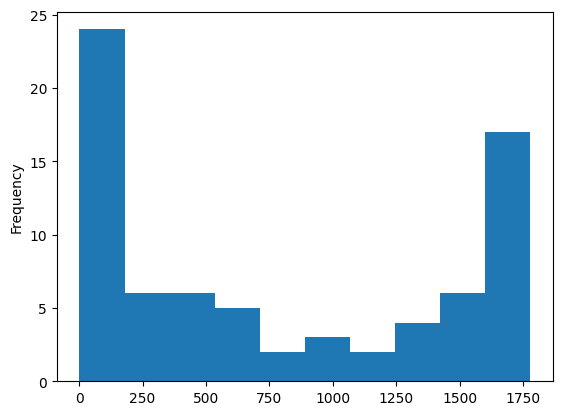

In [392]:
df['age_of_policyholder'].value_counts().plot(kind='hist')

In [393]:
df['airbags'].value_counts()

2    40425
6    16958
1     1209
Name: airbags, dtype: int64

In [394]:
df['airbags'].describe()

count    58592.000000
mean         3.137066
std          1.832641
min          1.000000
25%          2.000000
50%          2.000000
75%          6.000000
max          6.000000
Name: airbags, dtype: float64

<AxesSubplot: >

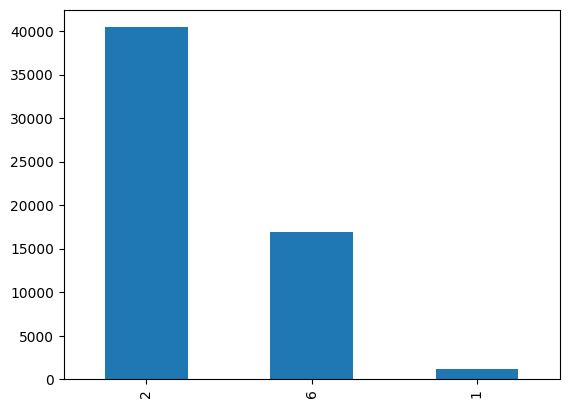

In [395]:
df['airbags'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='airbags'>

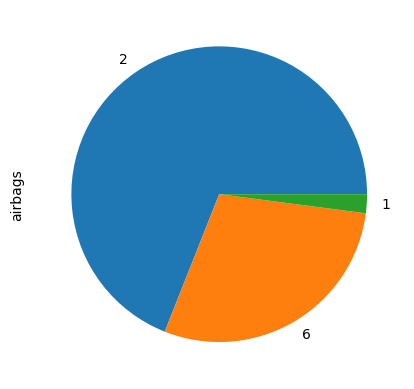

In [396]:
df['airbags'].value_counts().plot(kind='pie')

In [397]:
df['area_cluster'].value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

In [398]:
df['area_cluster'].describe()

count     58592
unique       22
top          C8
freq      13654
Name: area_cluster, dtype: object

<AxesSubplot: >

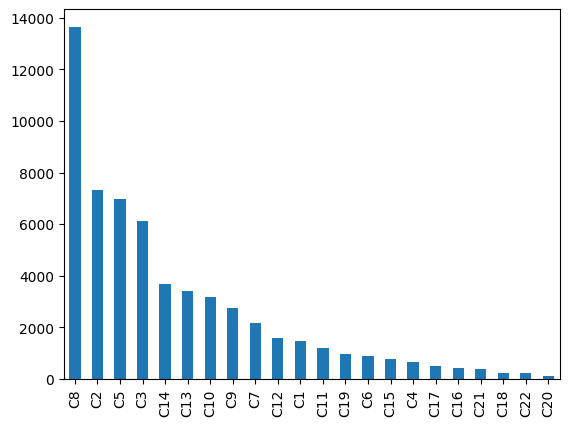

In [399]:
df['area_cluster'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='area_cluster'>

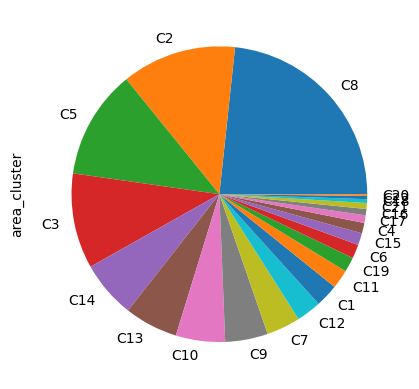

In [400]:
df['area_cluster'].value_counts().plot(kind='pie')

In [401]:
df['cylinder'].value_counts()

4    36735
3    21857
Name: cylinder, dtype: int64

In [402]:
df['cylinder'].describe()

count    58592.000000
mean         3.626963
std          0.483616
min          3.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: cylinder, dtype: float64

<AxesSubplot: >

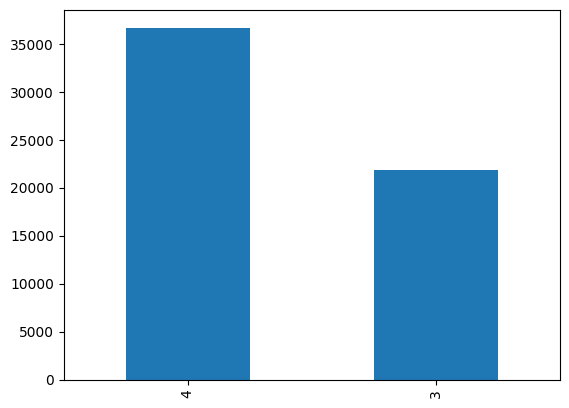

In [403]:
df['cylinder'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='cylinder'>

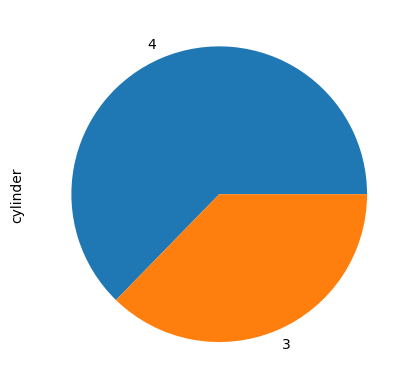

In [404]:
df['cylinder'].value_counts().plot(kind='pie')

In [405]:
df['displacement'].value_counts()

1197    17796
796     14948
1493    14018
998      4173
999      2373
1498     2114
1497     1598
1196     1209
1199      363
Name: displacement, dtype: int64

In [406]:
df['displacement'].describe()

count    58592.000000
mean      1162.355851
std        266.304786
min        796.000000
25%        796.000000
50%       1197.000000
75%       1493.000000
max       1498.000000
Name: displacement, dtype: float64

<AxesSubplot: >

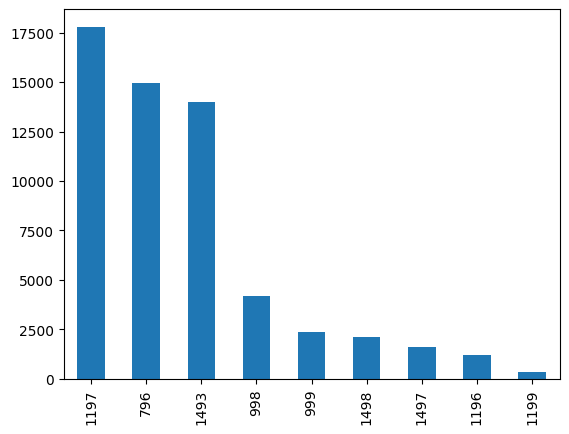

In [407]:
df['displacement'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='displacement'>

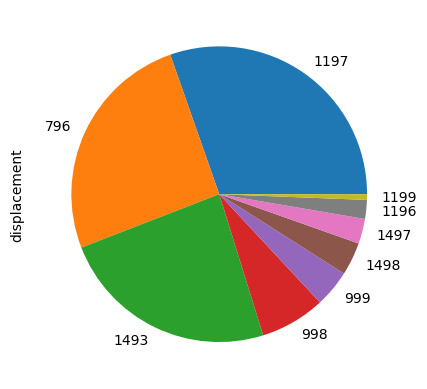

In [408]:
df['displacement'].value_counts().plot(kind='pie')

In [409]:
df['engine_type'].value_counts()

F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64

In [410]:
df['engine_type'].describe()

count                 58592
unique                   11
top       F8D Petrol Engine
freq                  14948
Name: engine_type, dtype: object

<AxesSubplot: >

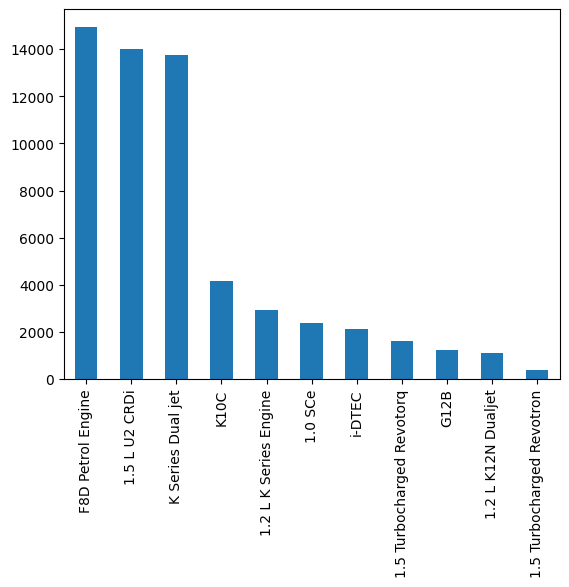

In [411]:
df['engine_type'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='engine_type'>

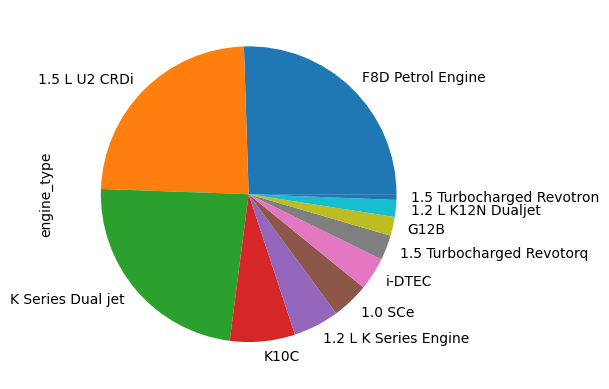

In [412]:
df['engine_type'].value_counts().plot(kind='pie')

In [413]:
df['fuel_type'].value_counts()

Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64

In [414]:
df['fuel_type'].describe()

count      58592
unique         3
top       Petrol
freq       20532
Name: fuel_type, dtype: object

<AxesSubplot: >

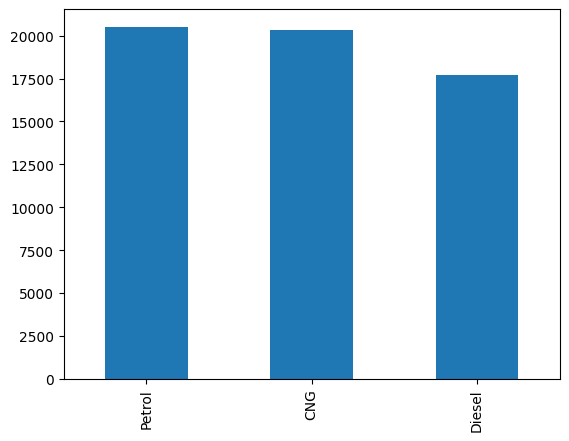

In [415]:
df['fuel_type'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='fuel_type'>

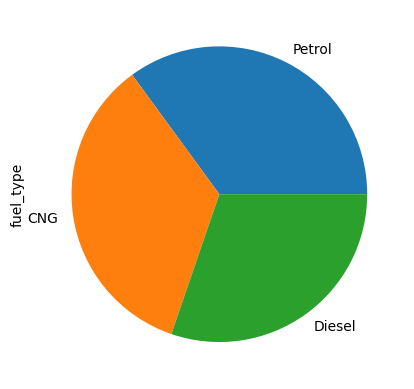

In [416]:
df['fuel_type'].value_counts().plot(kind='pie')

In [417]:
df['gear_box'].value_counts()

5    44211
6    14381
Name: gear_box, dtype: int64

In [418]:
df['gear_box'].describe ()

count    58592.000000
mean         5.245443
std          0.430353
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: gear_box, dtype: float64

<AxesSubplot: >

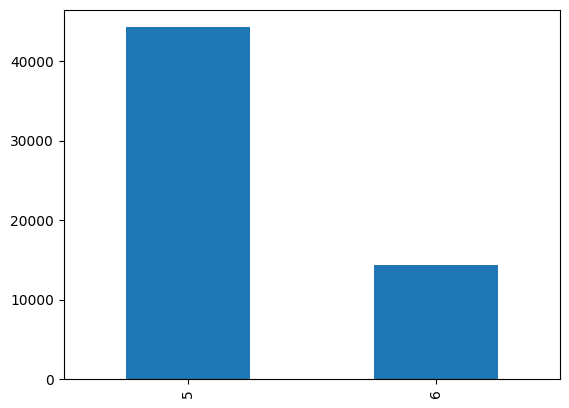

In [419]:
df['gear_box'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='gear_box'>

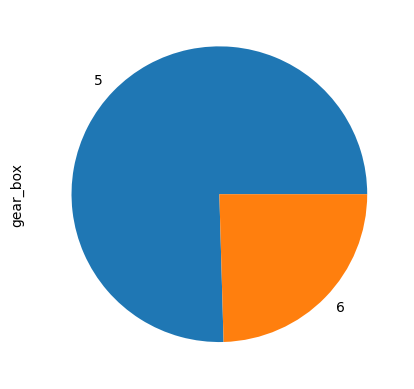

In [420]:
df['gear_box'].value_counts().plot(kind='pie')

In [421]:
df['gross_weight'].value_counts()

1185    14948
1335    14856
1720    14018
1340     4173
1410     2940
1155     2373
1051     2114
1490     1598
1510     1209
1660      363
Name: gross_weight, dtype: int64

In [422]:
df['gross_weight'].describe()

count    58592.000000
mean      1385.276813
std        212.423085
min       1051.000000
25%       1185.000000
50%       1335.000000
75%       1510.000000
max       1720.000000
Name: gross_weight, dtype: float64

<AxesSubplot: >

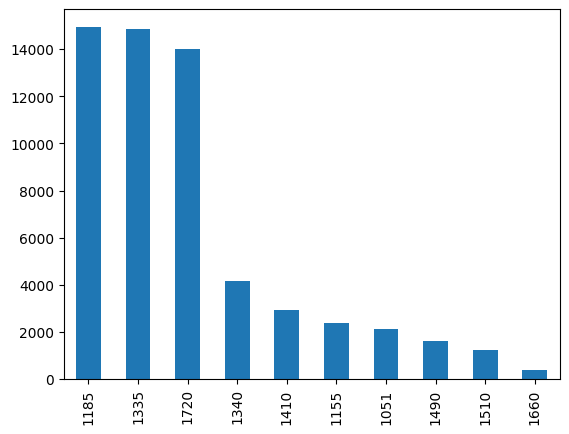

In [423]:
df['gross_weight'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='gross_weight'>

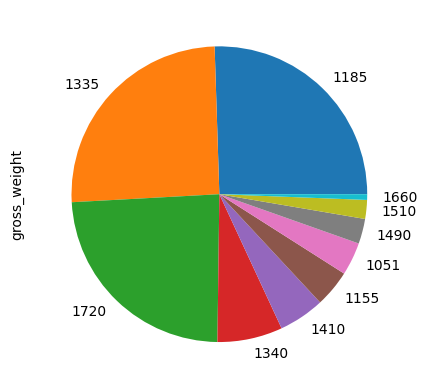

In [424]:
df['gross_weight'].value_counts().plot(kind='pie')

In [425]:
df['height'].value_counts()

1475    14948
1635    14018
1530    13776
1675     4173
1500     2940
1490     2373
1501     2114
1523     1598
1825     1209
1515     1080
1606      363
Name: height, dtype: int64

In [426]:
df['height'].describe()

count    58592.00000
mean      1553.33537
std         79.62227
min       1475.00000
25%       1475.00000
50%       1530.00000
75%       1635.00000
max       1825.00000
Name: height, dtype: float64

<AxesSubplot: >

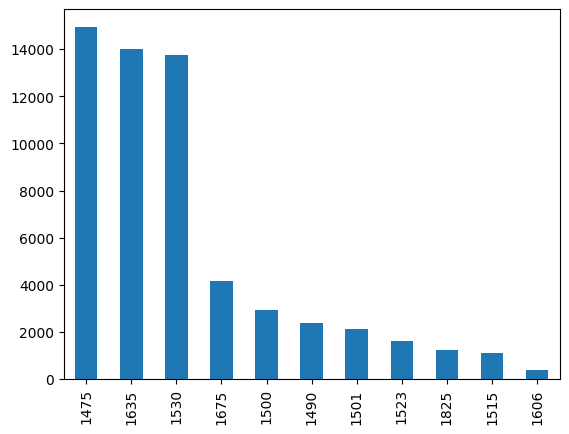

In [427]:
df['height'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='height'>

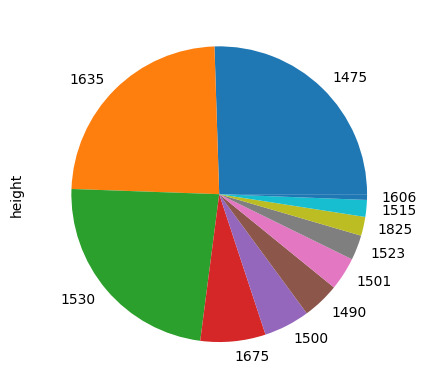

In [428]:
df['height'].value_counts().plot(kind='pie')

In [429]:
df['is_adjustable_steering'].value_counts()

Yes    35526
No     23066
Name: is_adjustable_steering, dtype: int64

<AxesSubplot: >

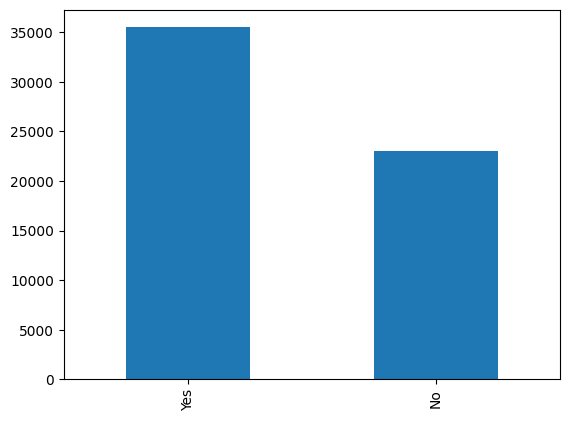

In [430]:
df['is_adjustable_steering'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_adjustable_steering'>

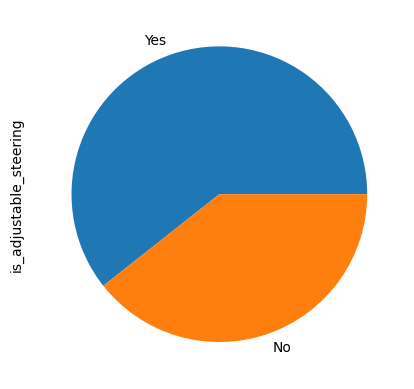

In [431]:
df['is_adjustable_steering'].value_counts().plot(kind='pie')

In [432]:
df['is_adjustable_steering'].describe()

count     58592
unique        2
top         Yes
freq      35526
Name: is_adjustable_steering, dtype: object

In [433]:
df['is_brake_assist'].value_counts()

Yes    32177
No     26415
Name: is_brake_assist, dtype: int64

<AxesSubplot: >

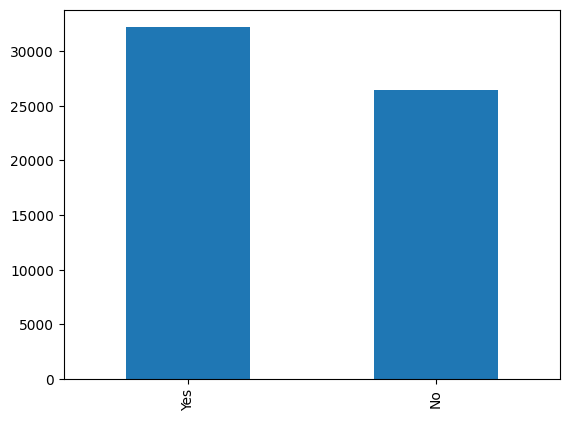

In [434]:
df['is_brake_assist'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_brake_assist'>

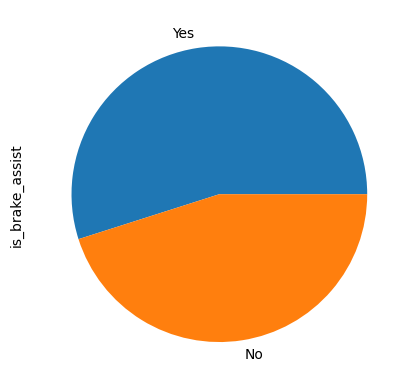

In [435]:
df['is_brake_assist'].value_counts().plot(kind='pie')

In [436]:
df['is_brake_assist'].describe()

count     58592
unique        2
top         Yes
freq      32177
Name: is_brake_assist, dtype: object

In [437]:
df['is_central_locking'].value_counts()

Yes    42435
No     16157
Name: is_central_locking, dtype: int64

<AxesSubplot: >

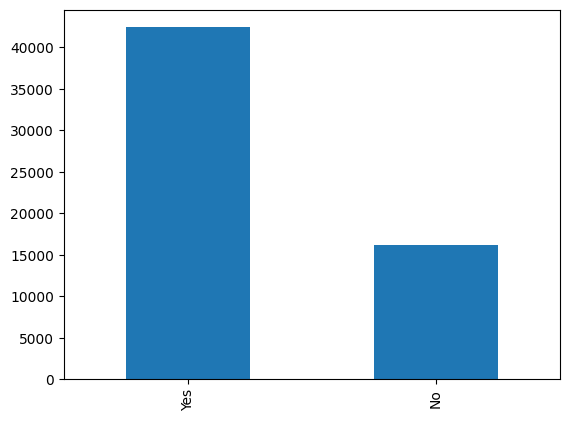

In [438]:
df['is_central_locking'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_central_locking'>

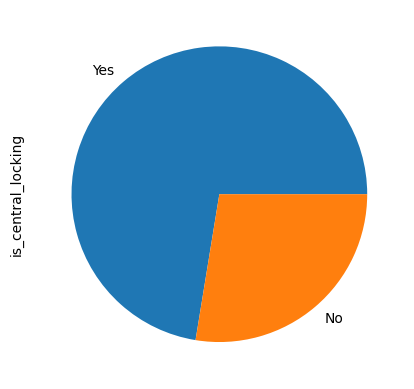

In [439]:
df['is_central_locking'].value_counts().plot(kind='pie')

In [440]:
df['is_central_locking'].describe()

count     58592
unique        2
top         Yes
freq      42435
Name: is_central_locking, dtype: object

In [441]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [442]:
df['is_claim'].value_counts().describe()

count        2.000000
mean     29296.000000
std      36130.328092
min       3748.000000
25%      16522.000000
50%      29296.000000
75%      42070.000000
max      54844.000000
Name: is_claim, dtype: float64

<AxesSubplot: >

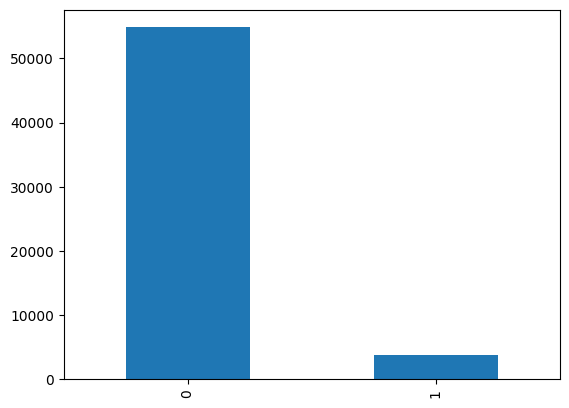

In [443]:
df['is_claim'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_claim'>

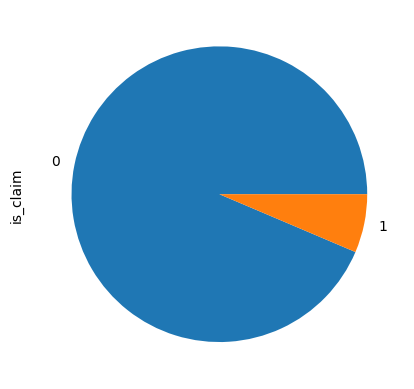

In [444]:
df['is_claim'].value_counts().plot(kind='pie')

In [445]:
df['is_day_night_rear_view_mirror'].value_counts()

No     36309
Yes    22283
Name: is_day_night_rear_view_mirror, dtype: int64

In [446]:
df['is_day_night_rear_view_mirror'].describe()

count     58592
unique        2
top          No
freq      36309
Name: is_day_night_rear_view_mirror, dtype: object

<AxesSubplot: >

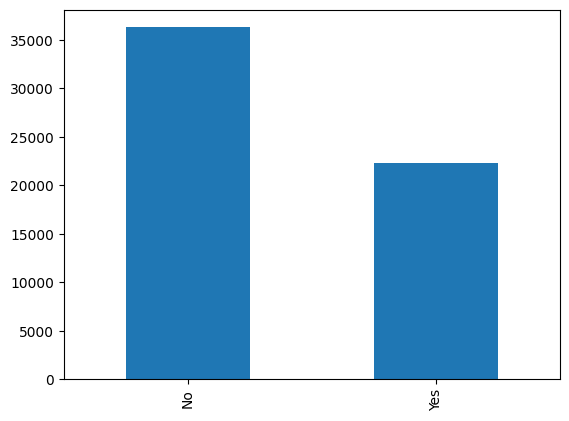

In [447]:
df['is_day_night_rear_view_mirror'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_day_night_rear_view_mirror'>

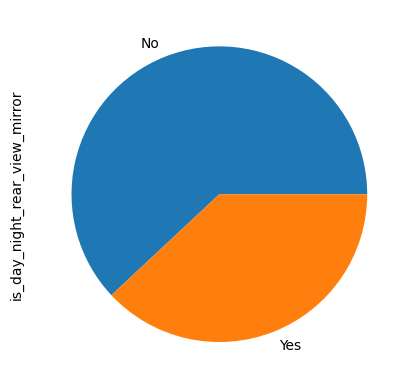

In [448]:
df['is_day_night_rear_view_mirror'].value_counts().plot(kind='pie')

In [449]:
df['is_driver_seat_height_adjustable'].value_counts()

Yes    34291
No     24301
Name: is_driver_seat_height_adjustable, dtype: int64

In [450]:
df['is_driver_seat_height_adjustable'].describe()

count     58592
unique        2
top         Yes
freq      34291
Name: is_driver_seat_height_adjustable, dtype: object

<AxesSubplot: >

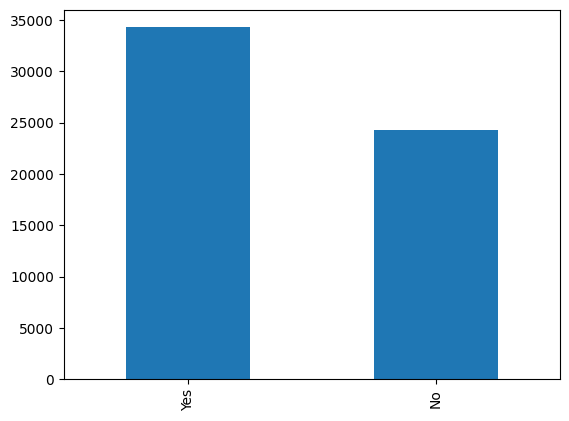

In [451]:
df['is_driver_seat_height_adjustable'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_driver_seat_height_adjustable'>

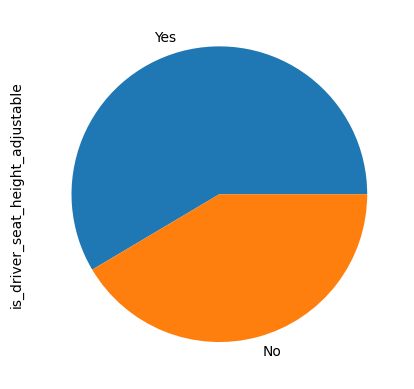

In [452]:
df['is_driver_seat_height_adjustable'].value_counts().plot(kind='pie')

In [453]:
df['is_ecw'].value_counts()

Yes    42435
No     16157
Name: is_ecw, dtype: int64

In [454]:
df['is_ecw'].value_counts().describe()

count        2.000000
mean     29296.000000
std      18581.351996
min      16157.000000
25%      22726.500000
50%      29296.000000
75%      35865.500000
max      42435.000000
Name: is_ecw, dtype: float64

<AxesSubplot: >

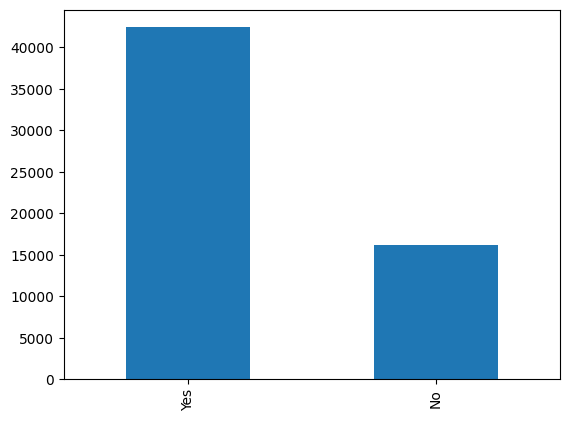

In [455]:
df['is_ecw'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_ecw'>

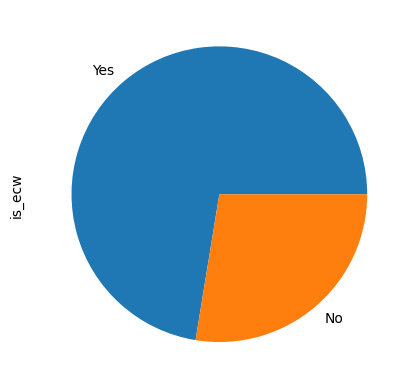

In [456]:
df['is_ecw'].value_counts().plot(kind='pie')

In [457]:
df['is_esc'].value_counts()

No     40191
Yes    18401
Name: is_esc, dtype: int64

In [458]:
df['is_esc'].describe()

count     58592
unique        2
top          No
freq      40191
Name: is_esc, dtype: object

<AxesSubplot: >

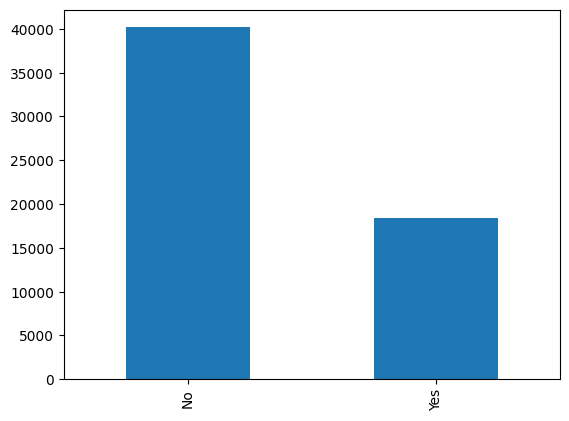

In [459]:
df['is_esc'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_esc'>

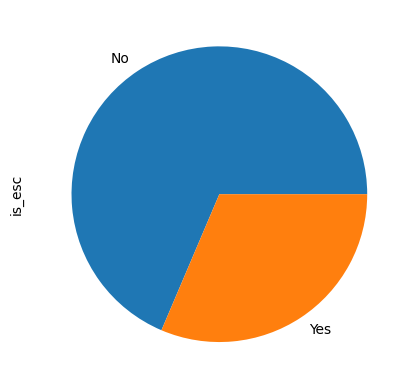

In [460]:
df['is_esc'].value_counts().plot(kind='pie')

In [461]:
df['is_front_fog_lights'].value_counts()

Yes    33928
No     24664
Name: is_front_fog_lights, dtype: int64

In [462]:
df['is_front_fog_lights'].describe()

count     58592
unique        2
top         Yes
freq      33928
Name: is_front_fog_lights, dtype: object

<AxesSubplot: >

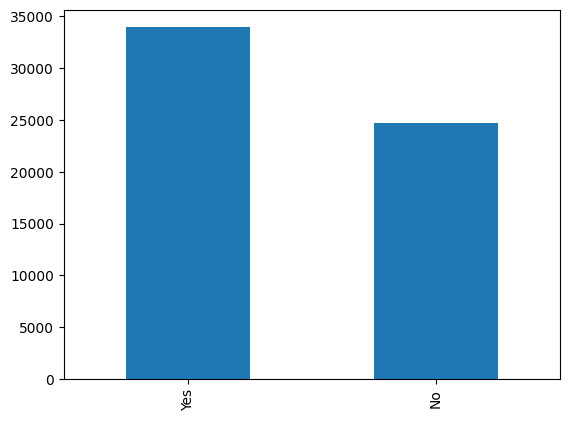

In [463]:
df['is_front_fog_lights'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_front_fog_lights'>

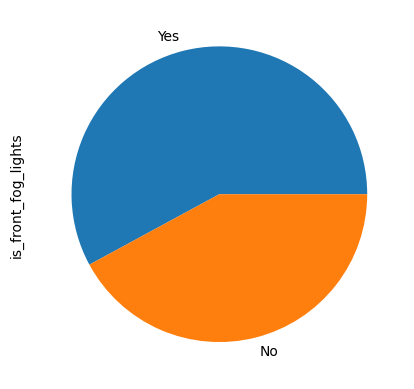

In [464]:
df['is_front_fog_lights'].value_counts().plot(kind='pie')

In [465]:
df['is_parking_camera'].value_counts()

No     35704
Yes    22888
Name: is_parking_camera, dtype: int64

In [466]:
df['is_parking_camera'].describe()

count     58592
unique        2
top          No
freq      35704
Name: is_parking_camera, dtype: object

<AxesSubplot: >

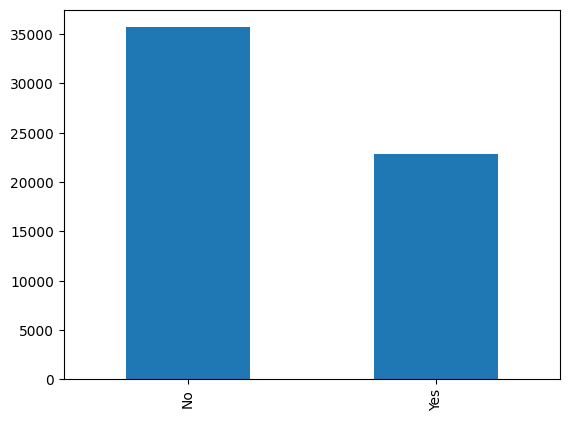

In [467]:
df['is_parking_camera'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_parking_camera'>

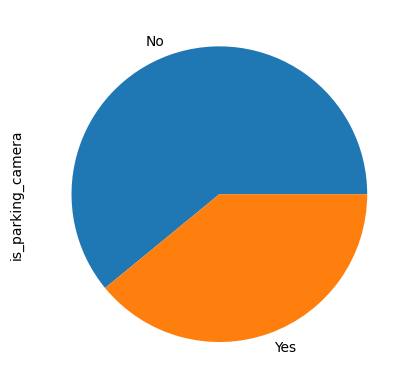

In [468]:
df['is_parking_camera'].value_counts().plot(kind='pie')

In [469]:
df['is_parking_sensors'].value_counts()

Yes    56219
No      2373
Name: is_parking_sensors, dtype: int64

In [470]:
df['is_parking_sensors'].describe()

count     58592
unique        2
top         Yes
freq      56219
Name: is_parking_sensors, dtype: object

<AxesSubplot: >

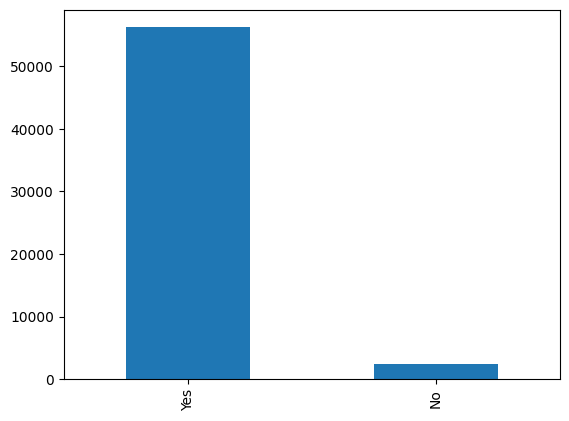

In [471]:
df['is_parking_sensors'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_parking_sensors'>

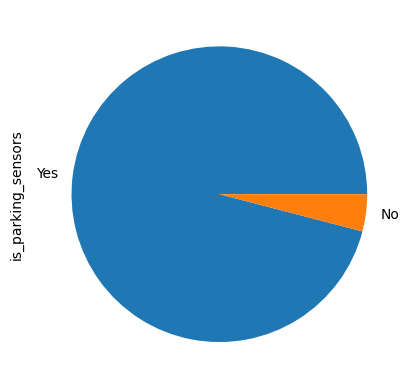

In [472]:
df['is_parking_sensors'].value_counts().plot(kind='pie')

In [473]:
df['is_power_door_locks'].value_counts()

Yes    42435
No     16157
Name: is_power_door_locks, dtype: int64

In [474]:
df['is_power_door_locks'].describe()

count     58592
unique        2
top         Yes
freq      42435
Name: is_power_door_locks, dtype: object

<AxesSubplot: >

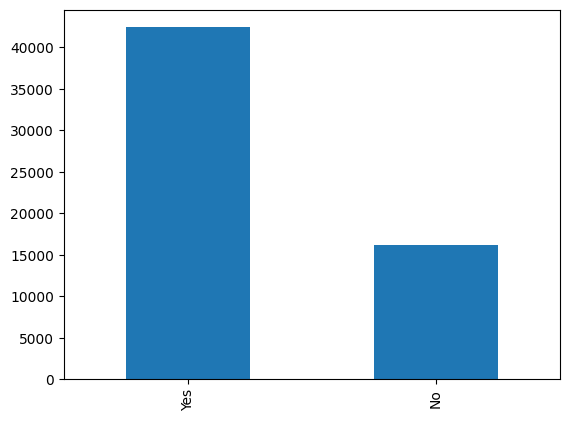

In [475]:
df['is_power_door_locks'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_power_door_locks'>

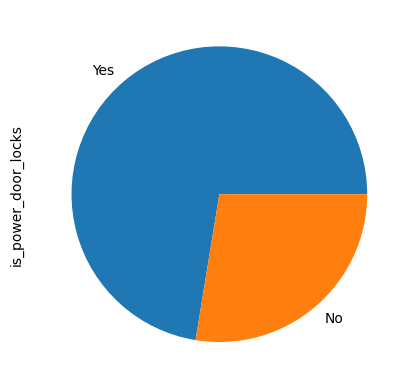

In [476]:
df['is_power_door_locks'].value_counts().plot(kind='pie')

In [477]:
df['is_power_steering'].value_counts()

Yes    57383
No      1209
Name: is_power_steering, dtype: int64

In [478]:
df['is_power_steering'].describe()

count     58592
unique        2
top         Yes
freq      57383
Name: is_power_steering, dtype: object

<AxesSubplot: >

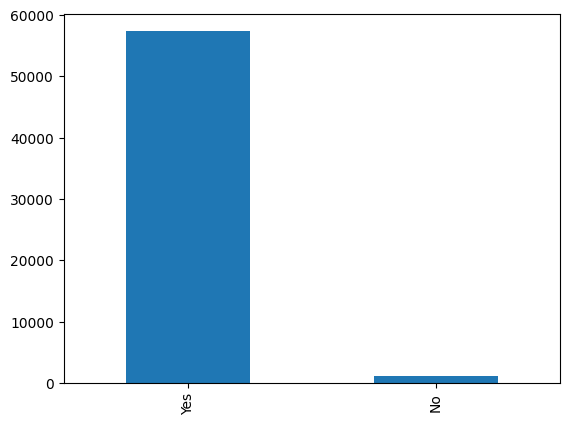

In [479]:
df['is_power_steering'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_power_steering'>

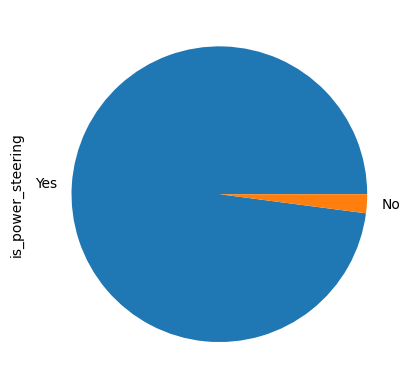

In [480]:
df['is_power_steering'].value_counts().plot(kind='pie')

In [481]:
df['is_rear_window_defogger'].value_counts()

No     38077
Yes    20515
Name: is_rear_window_defogger, dtype: int64

In [482]:
df['is_rear_window_defogger'].describe()

count     58592
unique        2
top          No
freq      38077
Name: is_rear_window_defogger, dtype: object

<AxesSubplot: >

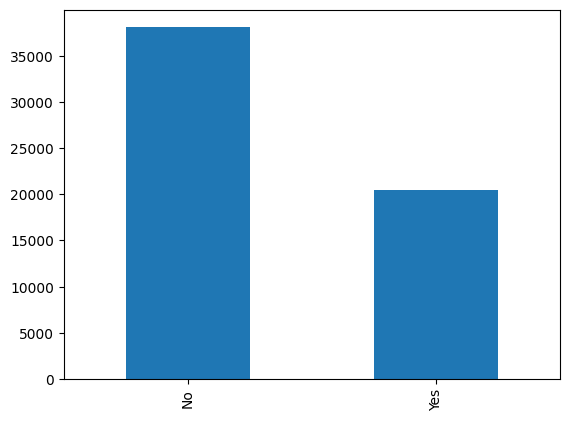

In [483]:
df['is_rear_window_defogger'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='is_rear_window_defogger'>

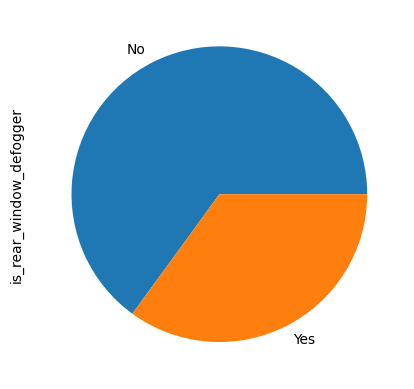

In [484]:
df['is_rear_window_defogger'].value_counts().plot(kind='pie')

In [485]:
df.select_dtypes('int').describe()

population_density          make       airbags  displacement  \
count        58592.000000  58592.000000  58592.000000  58592.000000   
mean         18826.858667      1.763722      3.137066   1162.355851   
std          17660.174792      1.136988      1.832641    266.304786   
min            290.000000      1.000000      1.000000    796.000000   
25%           6112.000000      1.000000      2.000000    796.000000   
50%           8794.000000      1.000000      2.000000   1197.000000   
75%          27003.000000      3.000000      6.000000   1493.000000   
max          73430.000000      5.000000      6.000000   1498.000000   

           cylinder      gear_box        length         width       height  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.00000   
mean       3.626963      5.245443   3850.476891   1672.233667   1553.33537   
std        0.483616      0.430353    311.457119    112.089135     79.62227   
min        3.000000      5.000000   3445.000000   1475.000000   1475.00000   
25%        3.000000      5.000000   3445.000000   1515.000000   1475.00000   
50%        4.000000      5.000000   3845.000000   1735.000000   1530.00000   
75%        4.000000      5.000000   3995.000000   1755.000000   1635.00000   
max        4.000000      6.000000   4300.000000   1811.000000   1825.00000   

       gross_weight   ncap_rating      is_claim  
count  58592.000000  58592.000000  58592.000000  
mean    1385.276813      1.759950      0.063968  
std      212.423085      1.389576      0.244698  
min     1051.000000      0.000000      0.000000  
25%     1185.000000      0.000000      0.000000  
50%     1335.000000      2.000000      0.000000  
75%     1510.000000      3.000000      0.000000  
max     1720.000000      5.000000      1.000000

In [486]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())
    print("*"*30)

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
******************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
******************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
******************************
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
******************************
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm

Splitting train and test

In [533]:
target = "is_claim"
X = df.drop(target, axis=1)
y = df[target]
print(X.shape, y.shape)

(58592, 41) (58592,)


In [611]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Resampling the data

In [540]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=1)
X_train_over, y_train_over = sampler.fit_resample(X_train,y_train)

In [536]:
print(X_train_over.shape, y_train_over.shape)

(87764, 41) (87764,)


In [551]:
categorical = df.select_dtypes(include =[object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 25
Index(['model', 'fuel_type', 'max_torque', 'max_power', 'engine_type',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Numerical Features in DataSet: 16
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


Univariate Analysis

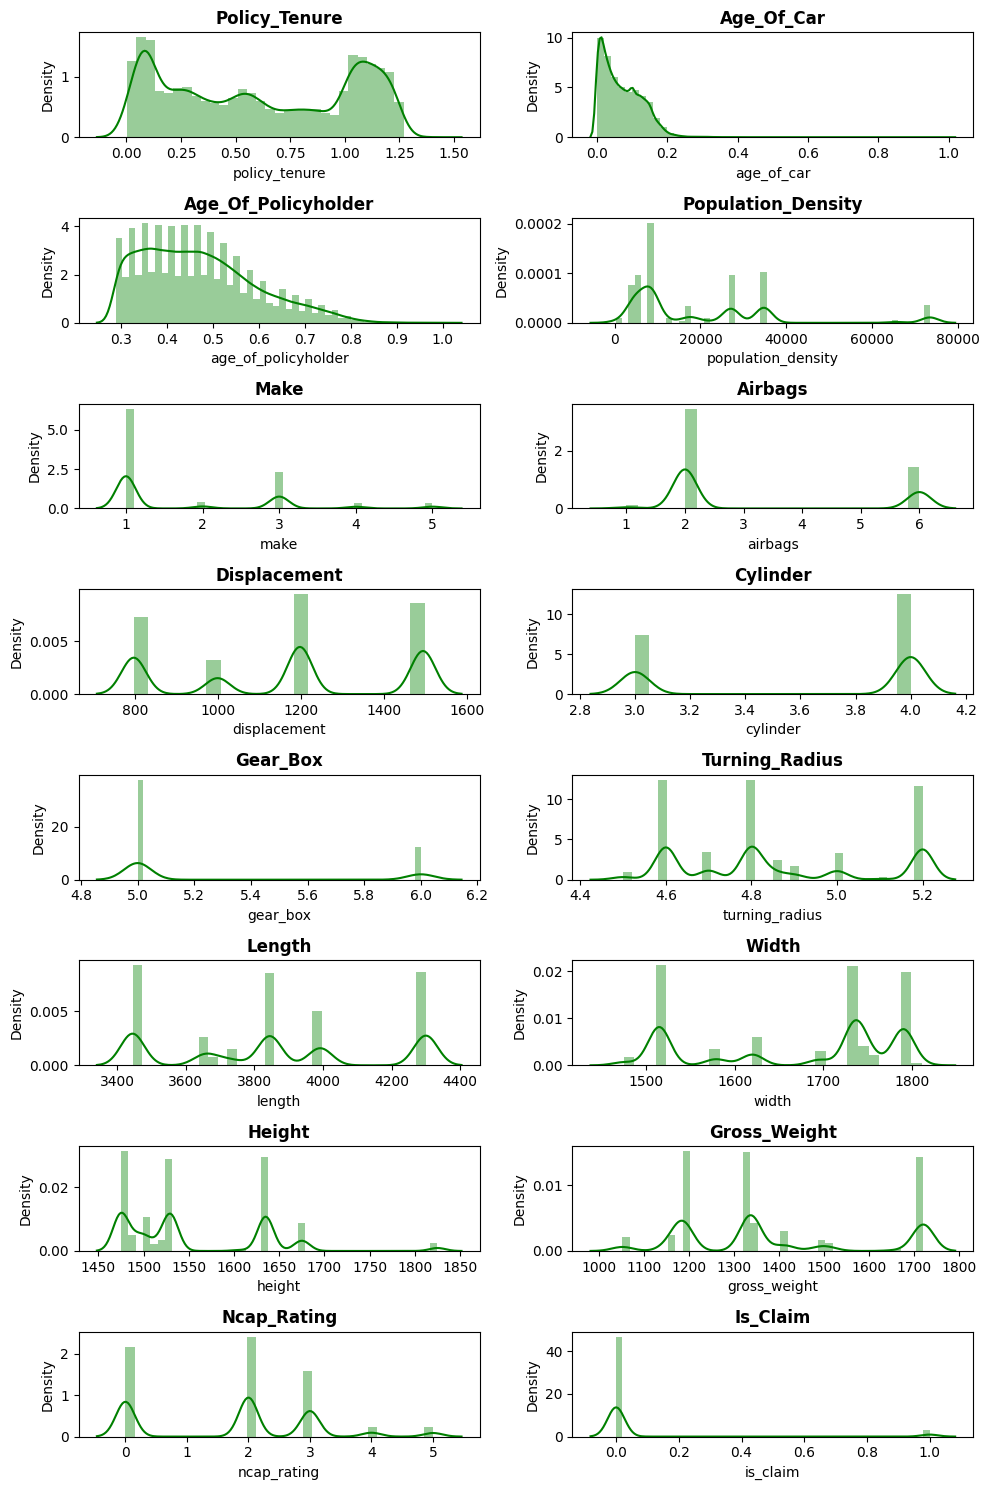

In [492]:
#Numerical Features
target = [i for i in numerical.columns]
plt.figure(figsize=(10,15))
for n,column in enumerate(target):
    plot=plt.subplot(8,2,n+1)
    sns.distplot(df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

In [493]:
df.drop('area_cluster',axis=1)
df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No            Yes            0         0  
2                        

 Bivariate analysis

<AxesSubplot: xlabel='fuel_type', ylabel='model'>

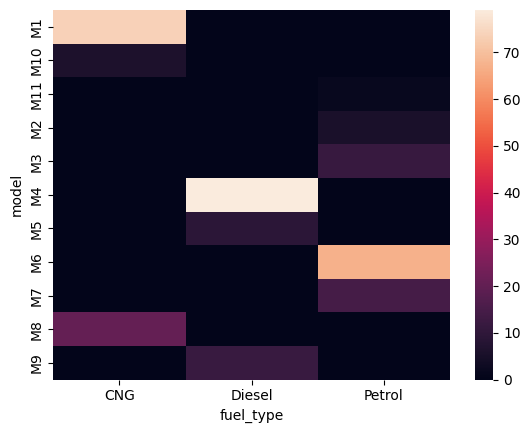

In [494]:
sns.heatmap(pd.crosstab(df['model'],df['fuel_type'],normalize='columns')*100)

In [495]:
pd.crosstab(df['model'],df['fuel_type'],normalize='columns')*100

fuel_type        CNG     Diesel     Petrol
model                                     
M1         73.526808   0.000000   0.000000
M10         5.946877   0.000000   0.000000
M11         0.000000   0.000000   1.767972
M2          0.000000   0.000000   5.260082
M3          0.000000   0.000000  11.557569
M4          0.000000  79.063734   0.000000
M5          0.000000   9.012972   0.000000
M6          0.000000   0.000000  67.095266
M7          0.000000   0.000000  14.319112
M8         20.526316   0.000000   0.000000
M9          0.000000  11.923294   0.000000

In [496]:
pd.crosstab(df['model'],df['segment'],normalize='columns')*100

segment          A     B1         B2         C1     C2  Utility
model                                                          
M1       86.299867    0.0   0.000000   0.000000    0.0      0.0
M10       0.000000    0.0   0.000000   0.000000    0.0    100.0
M11       0.000000    0.0   0.000000  10.205229    0.0      0.0
M2        0.000000    0.0   0.000000  30.362665    0.0      0.0
M3       13.700133    0.0   0.000000   0.000000    0.0      0.0
M4        0.000000    0.0   0.000000   0.000000  100.0      0.0
M5        0.000000    0.0   8.725565   0.000000    0.0      0.0
M6        0.000000    0.0  75.221142   0.000000    0.0      0.0
M7        0.000000    0.0  16.053293   0.000000    0.0      0.0
M8        0.000000  100.0   0.000000   0.000000    0.0      0.0
M9        0.000000    0.0   0.000000  59.432106    0.0      0.0

In [497]:
pd.crosstab(df['is_parking_sensors'],df['is_parking_camera'],normalize='columns')*100

is_parking_camera      No        Yes
is_parking_sensors                  
No                    0.0  10.367878
Yes                 100.0  89.632122

In [498]:
pd.crosstab(df['is_power_door_locks'],df['is_central_locking'],normalize='columns')*100

is_central_locking      No    Yes
is_power_door_locks              
No                   100.0    0.0
Yes                    0.0  100.0

In [499]:
pd.crosstab(df['transmission_type'],df['steering_type'],normalize='columns')*100

steering_type       Electric  Manual      Power
transmission_type                              
Automatic          26.770236     0.0  41.842278
Manual             73.229764   100.0  58.157722

In [500]:
target

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

Categorical columns

<AxesSubplot: xlabel='segment', ylabel='count'>

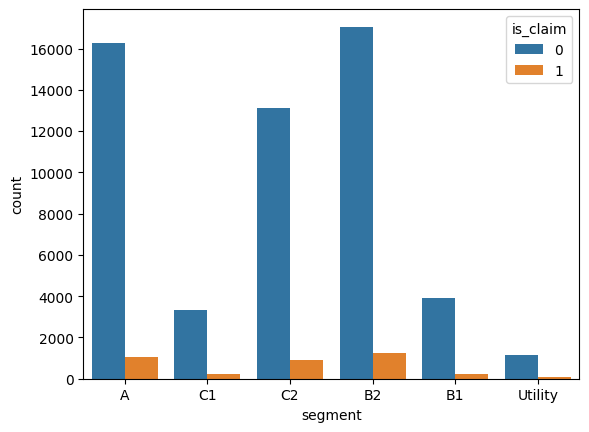

In [501]:
sns.countplot(x='segment',data=df,hue='is_claim')

<AxesSubplot: xlabel='model', ylabel='count'>

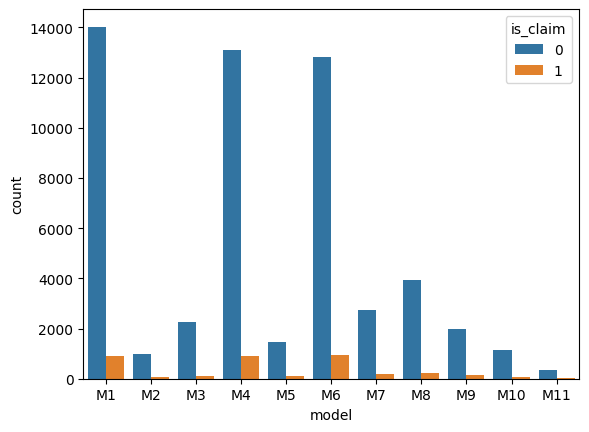

In [502]:
sns.countplot(x='model',data=df,hue='is_claim')

<AxesSubplot: xlabel='fuel_type', ylabel='count'>

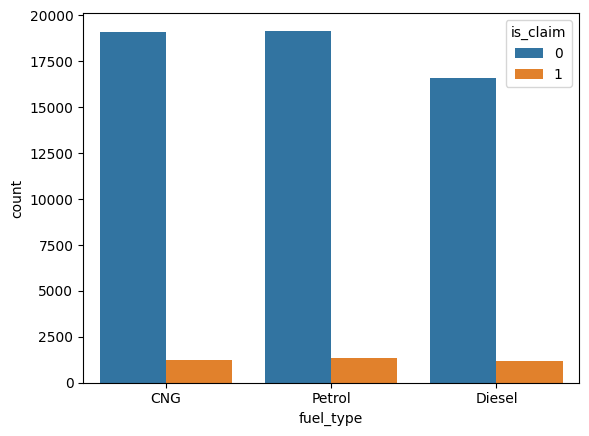

In [503]:
sns.countplot(x='fuel_type',data=df,hue='is_claim')

<AxesSubplot: xlabel='engine_type', ylabel='count'>

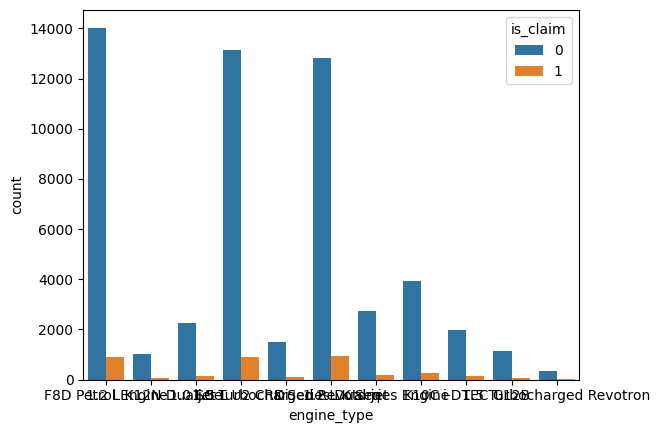

In [504]:
sns.countplot(x='engine_type',data=df,hue='is_claim')

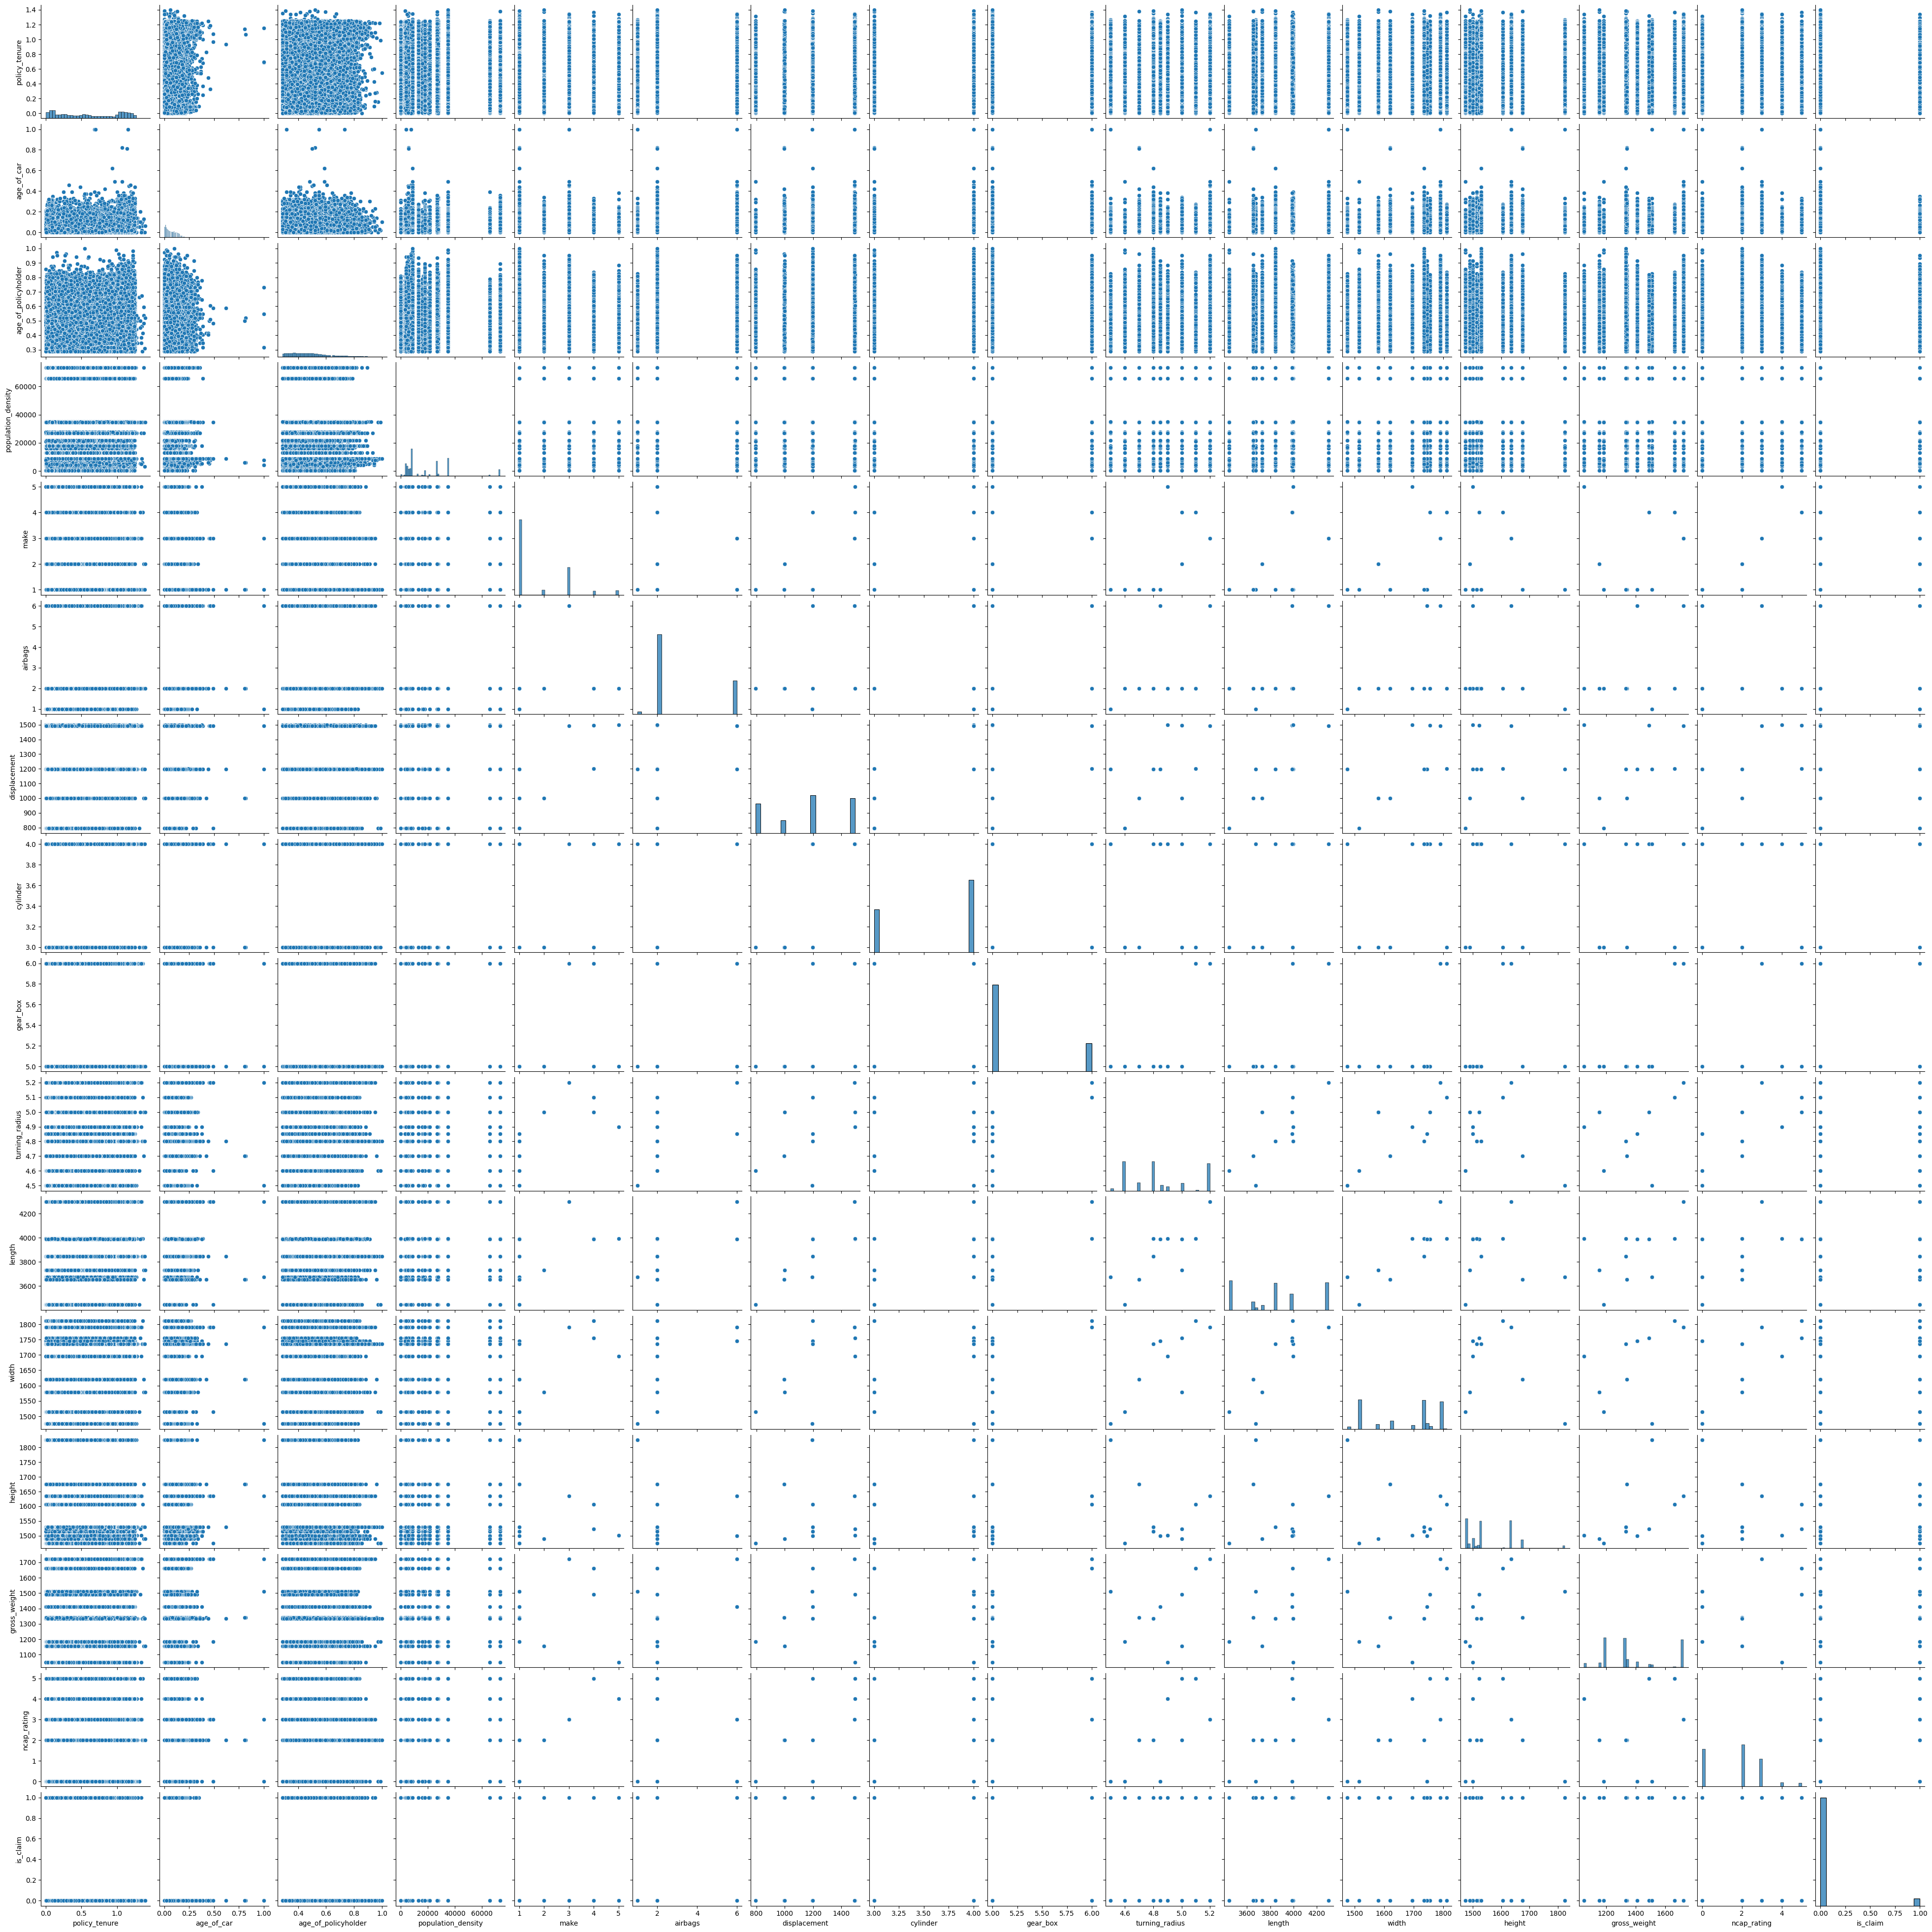

In [505]:
sns.pairplot(df)

<AxesSubplot: xlabel='is_esc', ylabel='count'>

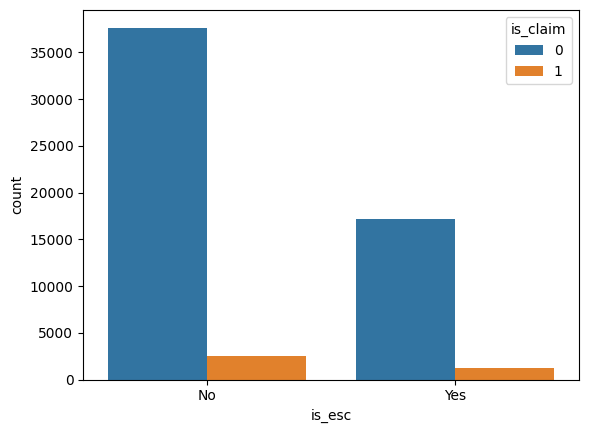

In [506]:
sns.countplot(x='is_esc',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_adjustable_steering', ylabel='count'>

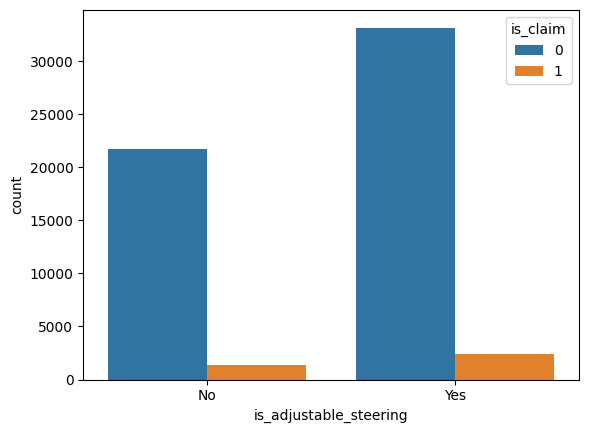

In [507]:
sns.countplot(x='is_adjustable_steering',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_tpms', ylabel='count'>

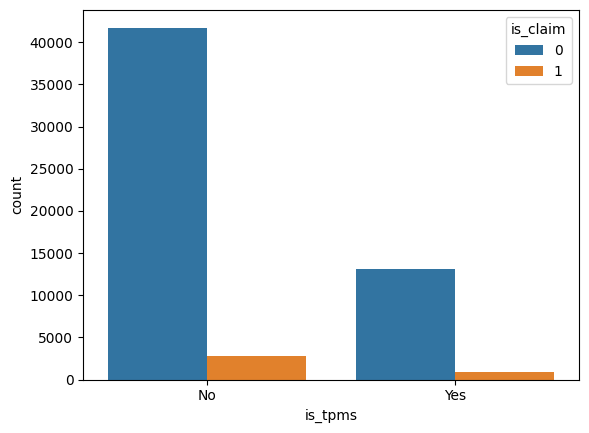

In [508]:
sns.countplot(x='is_tpms',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_parking_sensors', ylabel='count'>

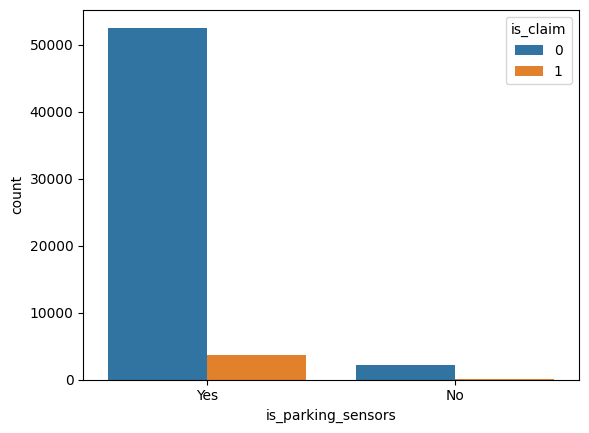

In [509]:
sns.countplot(x='is_parking_sensors',data=df,hue='is_claim')

<AxesSubplot: xlabel='rear_brakes_type', ylabel='count'>

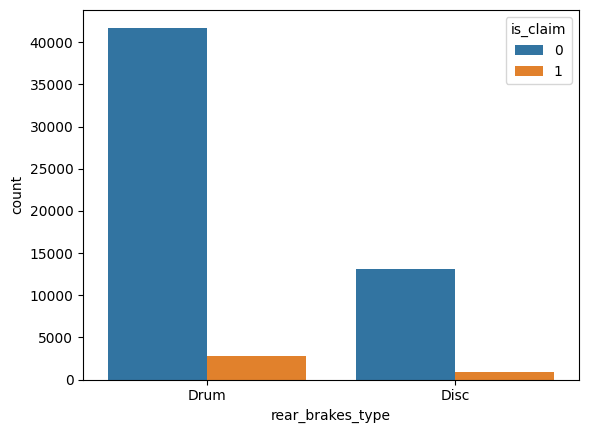

In [510]:
sns.countplot(x='rear_brakes_type',data=df,hue='is_claim')

<AxesSubplot: xlabel='transmission_type', ylabel='count'>

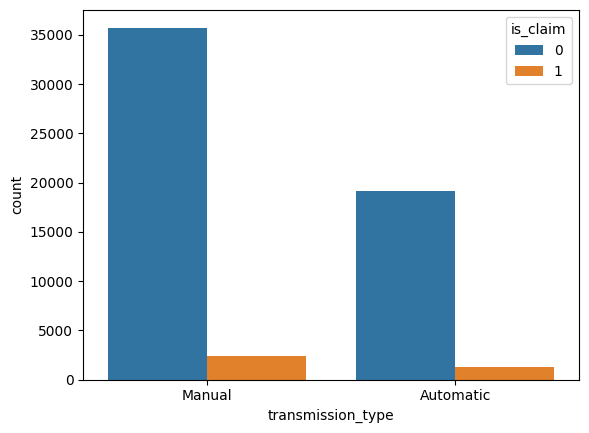

In [511]:
sns.countplot(x='transmission_type',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_parking_camera', ylabel='count'>

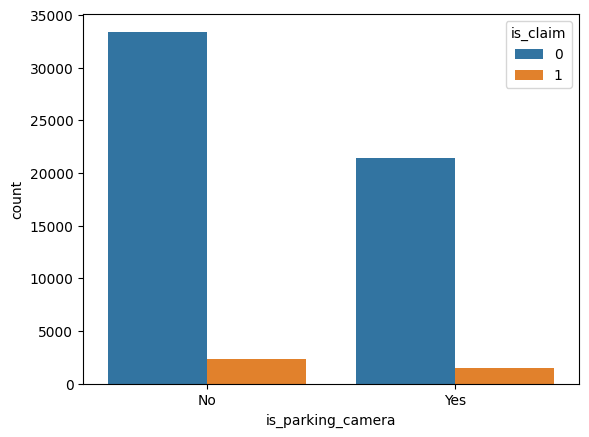

In [512]:
sns.countplot(x='is_parking_camera',data=df,hue='is_claim')

<AxesSubplot: xlabel='transmission_type', ylabel='count'>

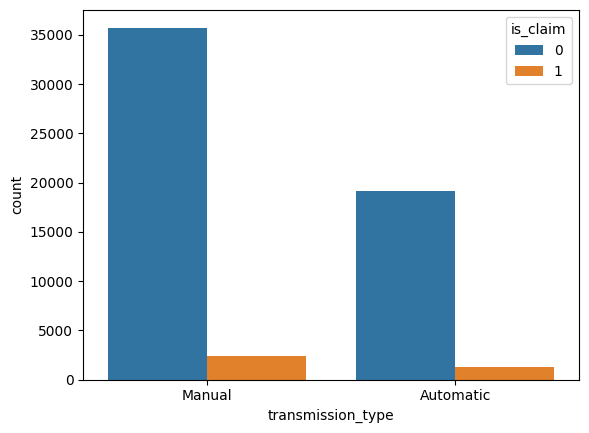

In [513]:
sns.countplot(x='transmission_type',data=df,hue='is_claim')

<AxesSubplot: xlabel='steering_type', ylabel='count'>

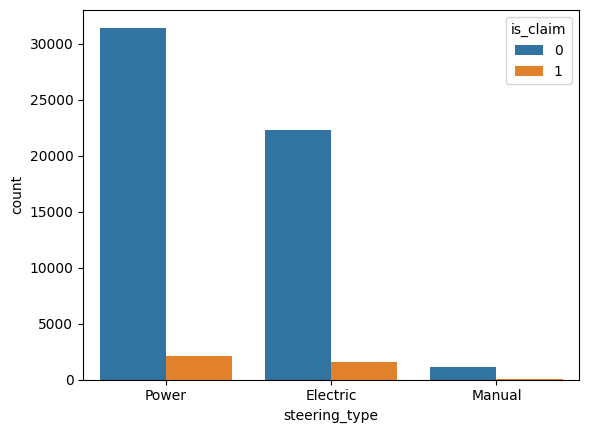

In [514]:
sns.countplot(x='steering_type',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_front_fog_lights', ylabel='count'>

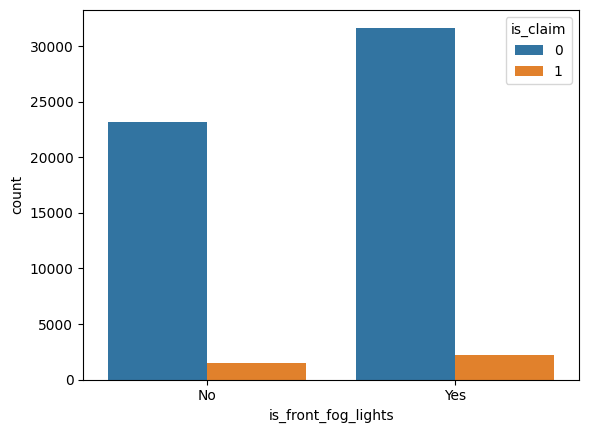

In [515]:
sns.countplot(x='is_front_fog_lights',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_rear_window_wiper', ylabel='count'>

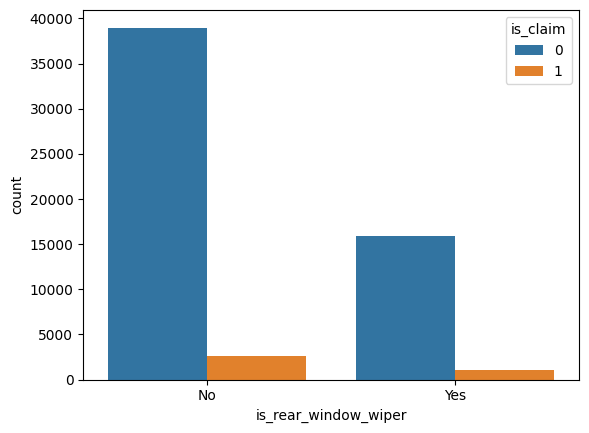

In [516]:
sns.countplot(x='is_rear_window_wiper',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_rear_window_washer', ylabel='count'>

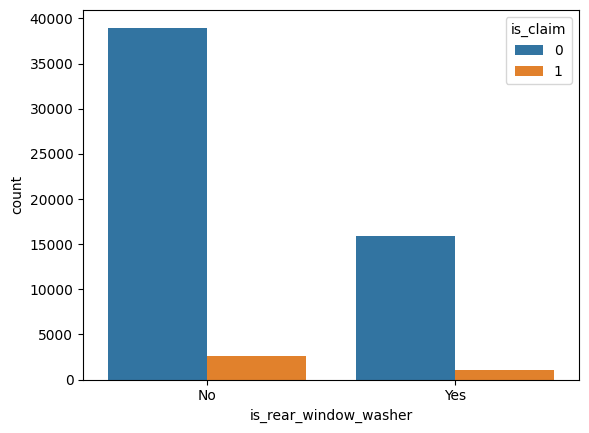

In [517]:
sns.countplot(x='is_rear_window_washer',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_rear_window_defogger', ylabel='count'>

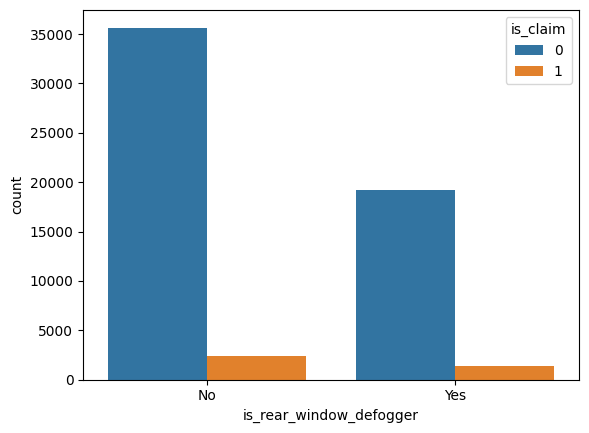

In [518]:
sns.countplot(x='is_rear_window_defogger',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_power_door_locks', ylabel='count'>

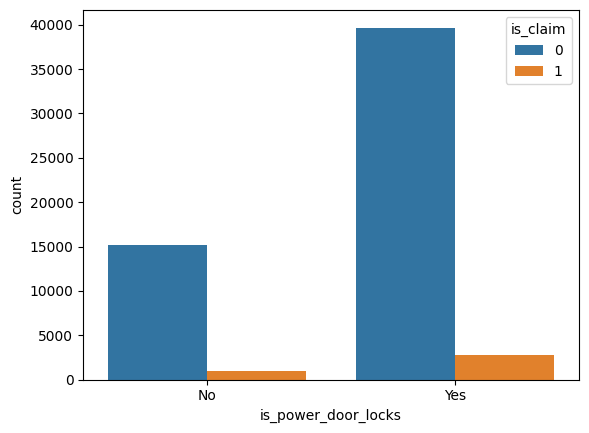

In [519]:
sns.countplot(x='is_power_door_locks',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_central_locking', ylabel='count'>

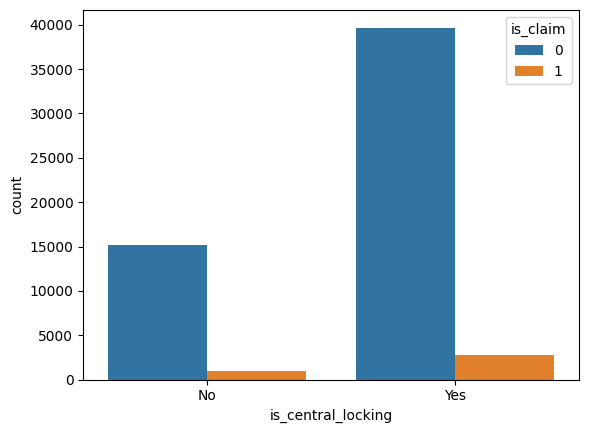

In [520]:
sns.countplot(x='is_central_locking',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_power_steering', ylabel='count'>

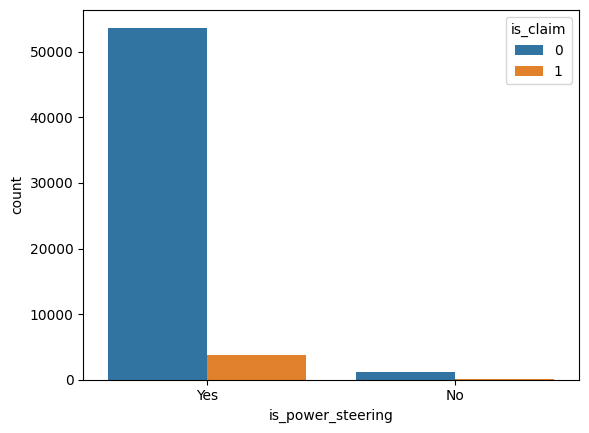

In [521]:
sns.countplot(x='is_power_steering',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_driver_seat_height_adjustable', ylabel='count'>

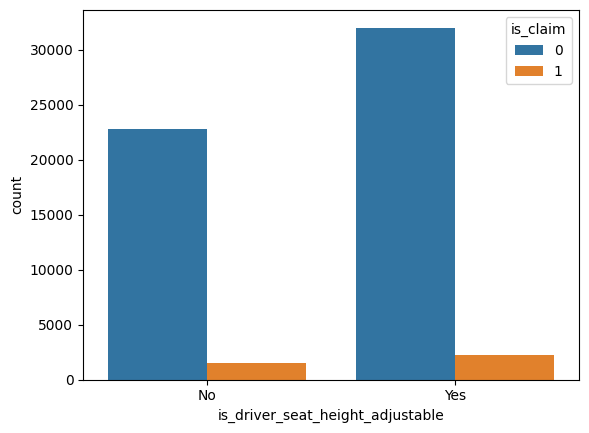

In [522]:
sns.countplot(x='is_driver_seat_height_adjustable',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_day_night_rear_view_mirror', ylabel='count'>

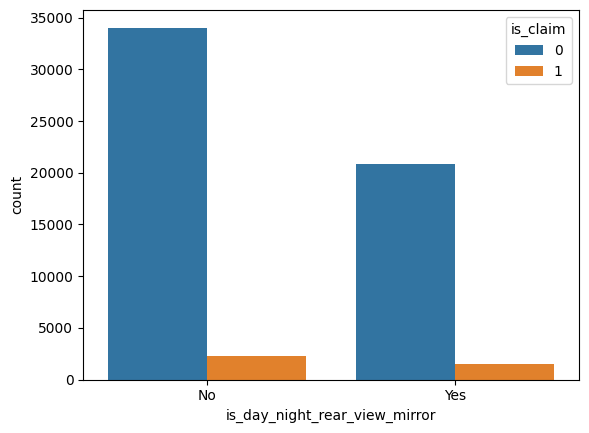

In [523]:
sns.countplot(x='is_day_night_rear_view_mirror',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_ecw', ylabel='count'>

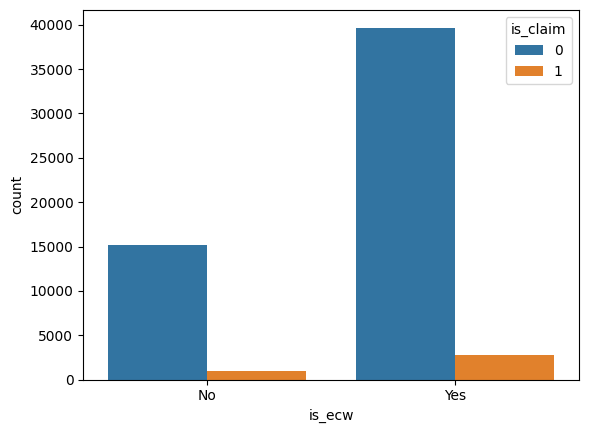

In [524]:
sns.countplot(x='is_ecw',data=df,hue='is_claim')

<AxesSubplot: xlabel='is_speed_alert', ylabel='count'>

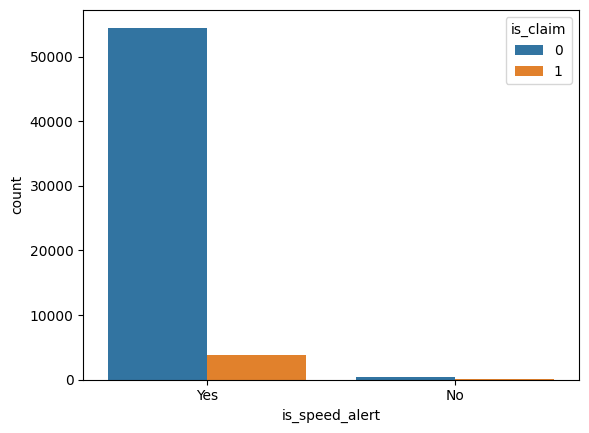

In [525]:
sns.countplot(x='is_speed_alert',data=df,hue='is_claim')

Therefore when we plotting with count plot with claim it shows more 0s as a output that means many of them doesn't claim the insurance within 6 months

<AxesSubplot: xlabel='model', ylabel='fuel_type'>

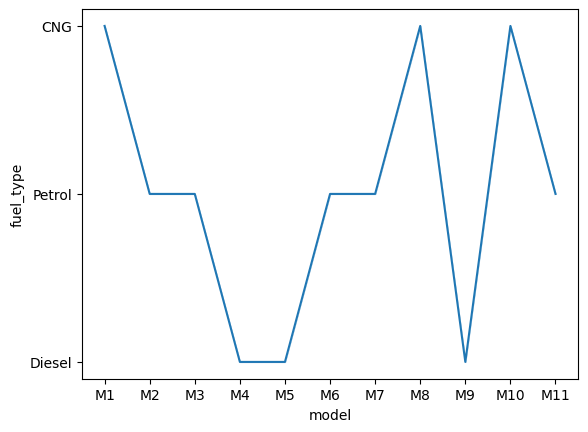

In [526]:
sns.lineplot(data=df,x='model',y='fuel_type')

<AxesSubplot: xlabel='model', ylabel='fuel_type'>

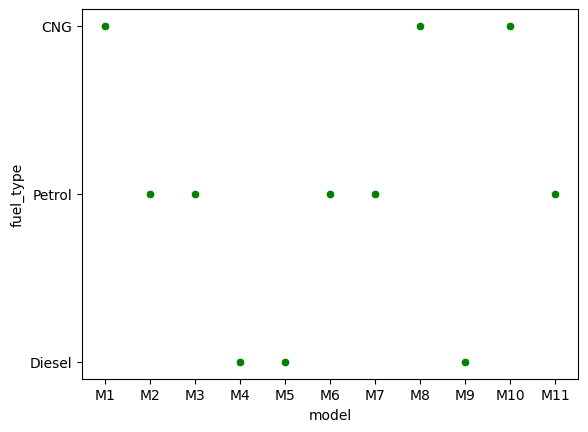

In [527]:
sns.scatterplot(data=df,x='model',y='fuel_type',color='green')

In [631]:
#df.drop('area_cluster',axis=1,inplace=True)

In [545]:
df.drop('segment',axis=1,inplace=True)

In [632]:
df.drop('policy_tenure',axis=1,inplace=True)

In [633]:
df

age_of_car  age_of_policyholder  population_density  make model  \
0            0.05             0.644231                4990     1    M1   
1            0.02             0.375000               27003     1    M1   
2            0.02             0.384615                4076     1    M1   
3            0.11             0.432692               21622     1    M2   
4            0.11             0.634615               34738     2    M3   
...           ...                  ...                 ...   ...   ...   
58587        0.13             0.644231                8794     2    M3   
58588        0.02             0.519231                7788     1    M1   
58589        0.05             0.451923               34738     1    M1   
58590        0.14             0.557692                8794     1    M6   
58591        0.02             0.442308                8794     3    M4   

      fuel_type     max_torque          max_power         engine_type  \
0           CNG   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine   
1           CNG   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine   
2           CNG   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine   
3        Petrol  113Nm@4400rpm   88.50bhp@6000rpm  1.2 L K12N Dualjet   
4        Petrol   91Nm@4250rpm   67.06bhp@5500rpm             1.0 SCe   
...         ...            ...                ...                 ...   
58587    Petrol   91Nm@4250rpm   67.06bhp@5500rpm             1.0 SCe   
58588       CNG   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine   
58589       CNG   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine   
58590    Petrol  113Nm@4400rpm   88.50bhp@6000rpm   K Series Dual jet   
58591    Diesel  250Nm@2750rpm  113.45bhp@4000rpm       1.5 L U2 CRDi   

       airbags is_esc is_adjustable_steering is_tpms is_parking_sensors  \
0            2     No                     No      No                Yes   
1            2     No                     No      No                Yes   
2            2     No                     No      No                Yes   
3            2    Yes                    Yes      No                Yes   
4            2     No                     No      No                 No   
...        ...    ...                    ...     ...                ...   
58587        2     No                     No      No                 No   
58588        2     No                     No      No                Yes   
58589        2     No                     No      No                Yes   
58590        2     No                    Yes      No                Yes   
58591        6    Yes                    Yes     Yes                Yes   

      is_parking_camera rear_brakes_type  displacement  cylinder  \
0                    No             Drum           796         3   
1                    No             Drum           796         3   
2                    No             Drum           796         3   
3                   Yes             Drum          1197         4   
4                   Yes             Drum           999         3   
...                 ...              ...           ...       ...   
58587               Yes             Drum           999         3   
58588                No             Drum           796         3   
58589                No             Drum           796         3   
58590                No             Drum          1197         4   
58591               Yes             Disc          1493         4   

      transmission_type  gear_box steering_type  turning_radius  length  \
0                Manual         5         Power             4.6    3445   
1                Manual         5         Power             4.6    3445   
2                Manual         5         Power             4.6    3445   
3             Automatic         5      Electric             4.8    3995   
4             Automatic         5      Electric             5.0    3731   
...                 ...       ...           ...             ...     ...  

In [634]:
data_with_dummies = pd.get_dummies(df, drop_first=True)

In [635]:
data_with_dummies.head()

age_of_car  age_of_policyholder  population_density  make  airbags  \
0        0.05             0.644231                4990     1        2   
1        0.02             0.375000               27003     1        2   
2        0.02             0.384615                4076     1        2   
3        0.11             0.432692               21622     1        2   
4        0.11             0.634615               34738     2        2   

   displacement  cylinder  gear_box  turning_radius  length  width  height  \
0           796         3         5             4.6    3445   1515    1475   
1           796         3         5             4.6    3445   1515    1475   
2           796         3         5             4.6    3445   1515    1475   
3          1197         4         5             4.8    3995   1735    1515   
4           999         3         5             5.0    3731   1579    1490   

   gross_weight  ncap_rating  is_claim  model_M10  model_M11  model_M2  \
0          1185            0         0          0          0         0   
1          1185            0         0          0          0         0   
2          1185            0         0          0          0         0   
3          1335            2         0          0          0         1   
4          1155            2         0          0          0         0   

   model_M3  model_M4  model_M5  model_M6  model_M7  model_M8  model_M9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   fuel_type_Diesel  fuel_type_Petrol  max_torque_170Nm@4000rpm  \
0                 0                 0                         0   
1                 0                 0                         0   
2                 0                 0                         0   
3                 0                 1                         0   
4                 0                 1                         0   

   max_torque_200Nm@1750rpm  max_torque_200Nm@3000rpm  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   max_torque_250Nm@2750rpm  max_torque_60Nm@3500rpm  \
0                         0                        1   
1                         0                        1   
2                         0                        1   
3                         0                        0   
4                         0                        0   

   max_torque_82.1Nm@3400rpm  max_torque_85Nm@3000rpm  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   max_torque_91Nm@4250rpm  max_power_118.36bhp@5500rpm  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        1                            0   

   max_power_40.36bhp@6000rpm  max_power_55.92bhp@5300rpm  \
0                           1                           0   
1                           1                           0   
2                           1                           0   
3                           0                           0   
4                           0                           0   

   max_power_61.68bhp@6000rpm  max_power_67.06bhp@5

Model Building

In [636]:
lr = make_pipeline(OneHotEncoder(),
                   LogisticRegression())
dt = make_pipeline(OrdinalEncoder(),
                  DecisionTreeClassifier(random_state=1))
rf = make_pipeline(OrdinalEncoder(),
                  RandomForestClassifier(random_state=1))
gb = make_pipeline(OrdinalEncoder(),
                  GradientBoostingClassifier(random_state=1))
ab = make_pipeline(OrdinalEncoder(),
                  AdaBoostClassifier(random_state=1))                                                                                

In [637]:
model_list = [("lr", lr),("dt", dt),("rf", rf),("gb", gb),("ab",ab)]

In [638]:
for name, model in model_list:
    
    model.fit(X_train_over, y_train_over)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    print(f"The test accuracy score of {name} is {score}")

The test accuracy score of lr is 0.40242341496714734
The test accuracy score of dt is 0.8818158545951019
The test accuracy score of rf is 0.9205563614642888
The test accuracy score of gb is 0.5667719088659442
The test accuracy score of ab is 0.5384418465739398


In [639]:
predict_train = model.predict(X_train_over)
print('Target on train data:\n',predict_train) 

accuracy_train=accuracy_score(y_train_over,predict_train)
print('accuracy_score on train dataset :', accuracy_train)

predict_test = model.predict(X_test)
print('Target on test data:\n',predict_test) 

accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset :', accuracy_test,)

Target on train data:
 [1 0 0 ... 0 1 1]
accuracy_score on train dataset : 0.6108224516305463
Target on test data:
 [0 0 0 ... 1 1 1]
accuracy_score on test dataset : 0.5384418465739398


From the above models Random forest performed best on the test data with accuracy score of 0.92

In [640]:
params = {"randomforestclassifier__n_estimators":range(25,125,25)}

In [602]:
Model = GridSearchCV(rf,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': range(25, 125, 25)},
             verbose=1)

In [641]:
Model.best_score_

0.988468819344939

In [642]:
Model.best_params_ 

{'randomforestclassifier__n_estimators': 100}

In [643]:
y_pred_test =  Model.predict(X_test)
print(round(accuracy_score(y_test, y_pred_test),2))

0.92


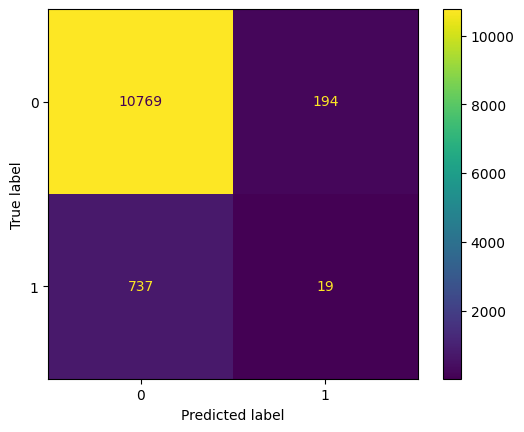

In [644]:
ConfusionMatrixDisplay.from_estimator(Model, X_test, y_test);

In [645]:
print(classification_report(y_test,y_pred_test))
print(roc_auc_score(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10963
           1       0.09      0.03      0.04       756

    accuracy                           0.92     11719
   macro avg       0.51      0.50      0.50     11719
weighted avg       0.88      0.92      0.90     11719

0.5037181944848642


In [1]:
X

NameError: name 'X' is not defined